# Necessary Libraries
- pip install numpy
- pip install matplotlib
- pip install pandas
- pip install seaborn
- pip install scipy
- pip install scikit-learn
- pip install imblearn
- pip install tensorflow
- pip install xgboost

## Importing all necessary libraries

In [ ]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import skew, kurtosis
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler, label_binarize, LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.utils.multiclass import unique_labels

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

import xgboost as xgb
from xgboost import XGBClassifier
from itertools import cycle

import joblib
from joblib import dump
import json


In [ ]:
data = pd.read_csv("/content/Cp excel dataset.csv")
data

datetime  main.aqi  components.co  components.no  \
0      2023-11-06 15:52:39+08:00         1         213.62           0.34   
1      2023-11-06 15:53:32+08:00         1         250.34           0.38   
2      2023-11-06 15:54:23+08:00         1         223.64           0.13   
3      2023-11-06 15:54:48+08:00         2         297.07           0.22   
4      2023-11-06 15:54:54+08:00         1         243.66           0.18   
...                          ...       ...            ...            ...   
37620  2025-05-31 23:01:12+08:00         1         186.13           0.14   
37621  2025-05-31 23:02:01+08:00         1         101.46           0.00   
37622  2025-05-31 23:02:23+08:00         1         191.93           0.00   
37623  2025-05-31 23:02:30+08:00         1         103.00           0.00   
37624  2025-05-31 23:02:51+08:00         1         113.17           0.00   

       components.no2  components.o3  components.so2  components.pm2_5  \
0                6.08          56.51            6.56              2.64   
1                3.04          52.93            4.05              5.27   
2                1.48          40.77            0.98              2.66   
3                2.38          42.92            7.21             14.82   
4                1.67          37.55            1.25              4.36   
...               ...            ...             ...               ...   
37620            2.40          29.15            0.55              6.24   
37621            0.10          27.01            0.05              0.97   
37622            2.00          32.70            0.51              6.33   
37623            0.12          27.06            0.05              1.03   
37624            0.68          30.10            0.18              1.00   

       components.pm10  components.nh3  coord.lon  coord.lat      city_name  
0                 3.16            0.97   121.0500    13.7500  Batangas City  
1                 6.96            2.82   123.8907    10.3167      Cebu City  
2                 3.23            1.44   122.5500    10.7500    Iloilo City  
3                15.48            1.49   123.7333    13.1333   Legazpi City  
4                 5.01            1.93   122.5967    10.8794         Lucena  
...                ...             ...        ...        ...            ...  
37620             6.93            4.07   123.8907    10.3167      Cebu City  
37621             1.53            0.01   122.5500    10.7500    Iloilo City  
37622             7.02            3.55   123.7333    13.1333   Legazpi City  
37623             1.59            0.11   122.5967    10.8794         Lucena  
37624             1.49            0.65   120.9822    14.6042         Manila  

[37625 rows x 13 columns]

In [ ]:
rows, coloumns = data.shape
print ('number of records:', rows)
print ('number of features:', coloumns)

number of records: 37625
number of features: 13


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37625 entries, 0 to 37624
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          37625 non-null  object 
 1   main.aqi          37625 non-null  int64  
 2   components.co     37625 non-null  float64
 3   components.no     37625 non-null  float64
 4   components.no2    37625 non-null  float64
 5   components.o3     37625 non-null  float64
 6   components.so2    37625 non-null  float64
 7   components.pm2_5  37625 non-null  float64
 8   components.pm10   37625 non-null  float64
 9   components.nh3    37625 non-null  float64
 10  coord.lon         37625 non-null  float64
 11  coord.lat         37625 non-null  float64
 12  city_name         37625 non-null  object 
dtypes: float64(10), int64(1), object(2)
memory usage: 3.7+ MB


In [ ]:
data.head(5)

datetime  main.aqi  components.co  components.no  \
0  2023-11-06 15:52:39+08:00         1         213.62           0.34   
1  2023-11-06 15:53:32+08:00         1         250.34           0.38   
2  2023-11-06 15:54:23+08:00         1         223.64           0.13   
3  2023-11-06 15:54:48+08:00         2         297.07           0.22   
4  2023-11-06 15:54:54+08:00         1         243.66           0.18   

   components.no2  components.o3  components.so2  components.pm2_5  \
0            6.08          56.51            6.56              2.64   
1            3.04          52.93            4.05              5.27   
2            1.48          40.77            0.98              2.66   
3            2.38          42.92            7.21             14.82   
4            1.67          37.55            1.25              4.36   

   components.pm10  components.nh3  coord.lon  coord.lat      city_name  
0             3.16            0.97   121.0500    13.7500  Batangas City  
1             6.96            2.82   123.8907    10.3167      Cebu City  
2             3.23            1.44   122.5500    10.7500    Iloilo City  
3            15.48            1.49   123.7333    13.1333   Legazpi City  
4             5.01            1.93   122.5967    10.8794         Lucena

In [ ]:
data["main.aqi"].value_counts()

main.aqi
1    22631
2    12223
3     2038
4      381
5      352
Name: count, dtype: int64

In [ ]:
data["city_name"].value_counts()

city_name
Lucena           6273
Manila           6273
Legazpi City     6272
Iloilo City      6271
Cebu City        6270
Batangas City    6266
Name: count, dtype: int64

Exploratory data analysis

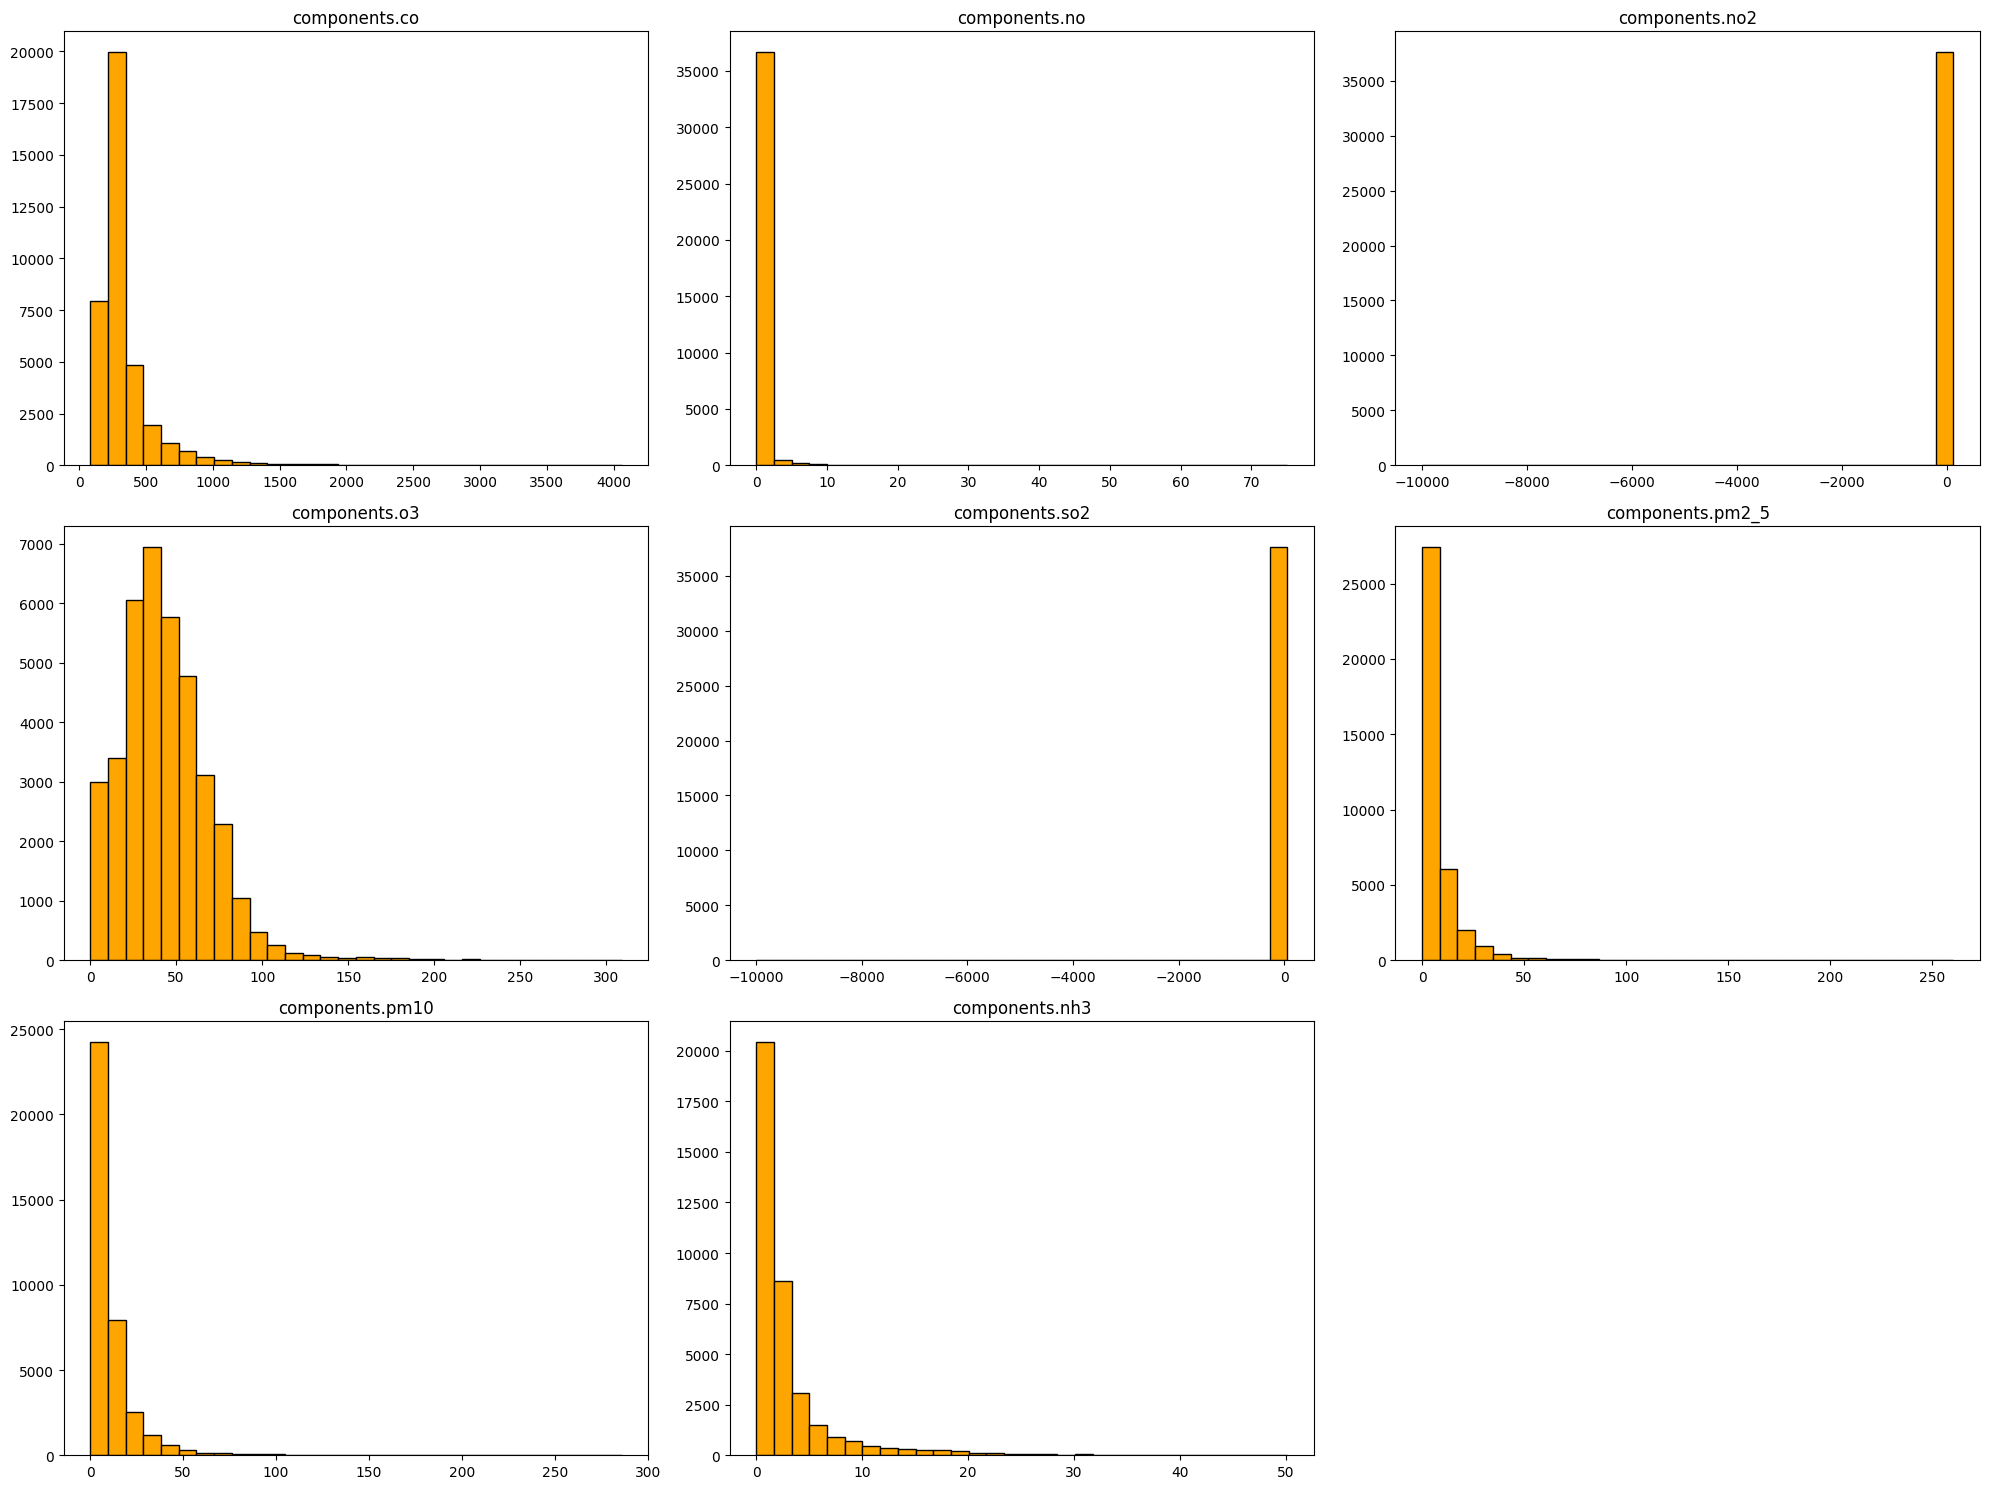

In [ ]:
pollutant_columns = ['components.co', 'components.no', 'components.no2',
    'components.o3', 'components.so2', 'components.pm2_5',
    'components.pm10', 'components.nh3']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in pollutant_columns:
    trace_x = counter // 3
    trace_y = counter % 3

    axs[trace_x, trace_y].hist(data[num_column].dropna(), bins=30, color='orange', edgecolor='black')
    axs[trace_x, trace_y].set_title(num_column)

    counter += 1

axs[2, 2].axis('off')

plt.tight_layout()
plt.show()


Finding the Missing Values

In [ ]:
data.isnull().sum()


datetime            0
main.aqi            0
components.co       0
components.no       0
components.no2      0
components.o3       0
components.so2      0
components.pm2_5    0
components.pm10     0
components.nh3      0
coord.lon           0
coord.lat           0
city_name           0
dtype: int64

Finding the Outliers

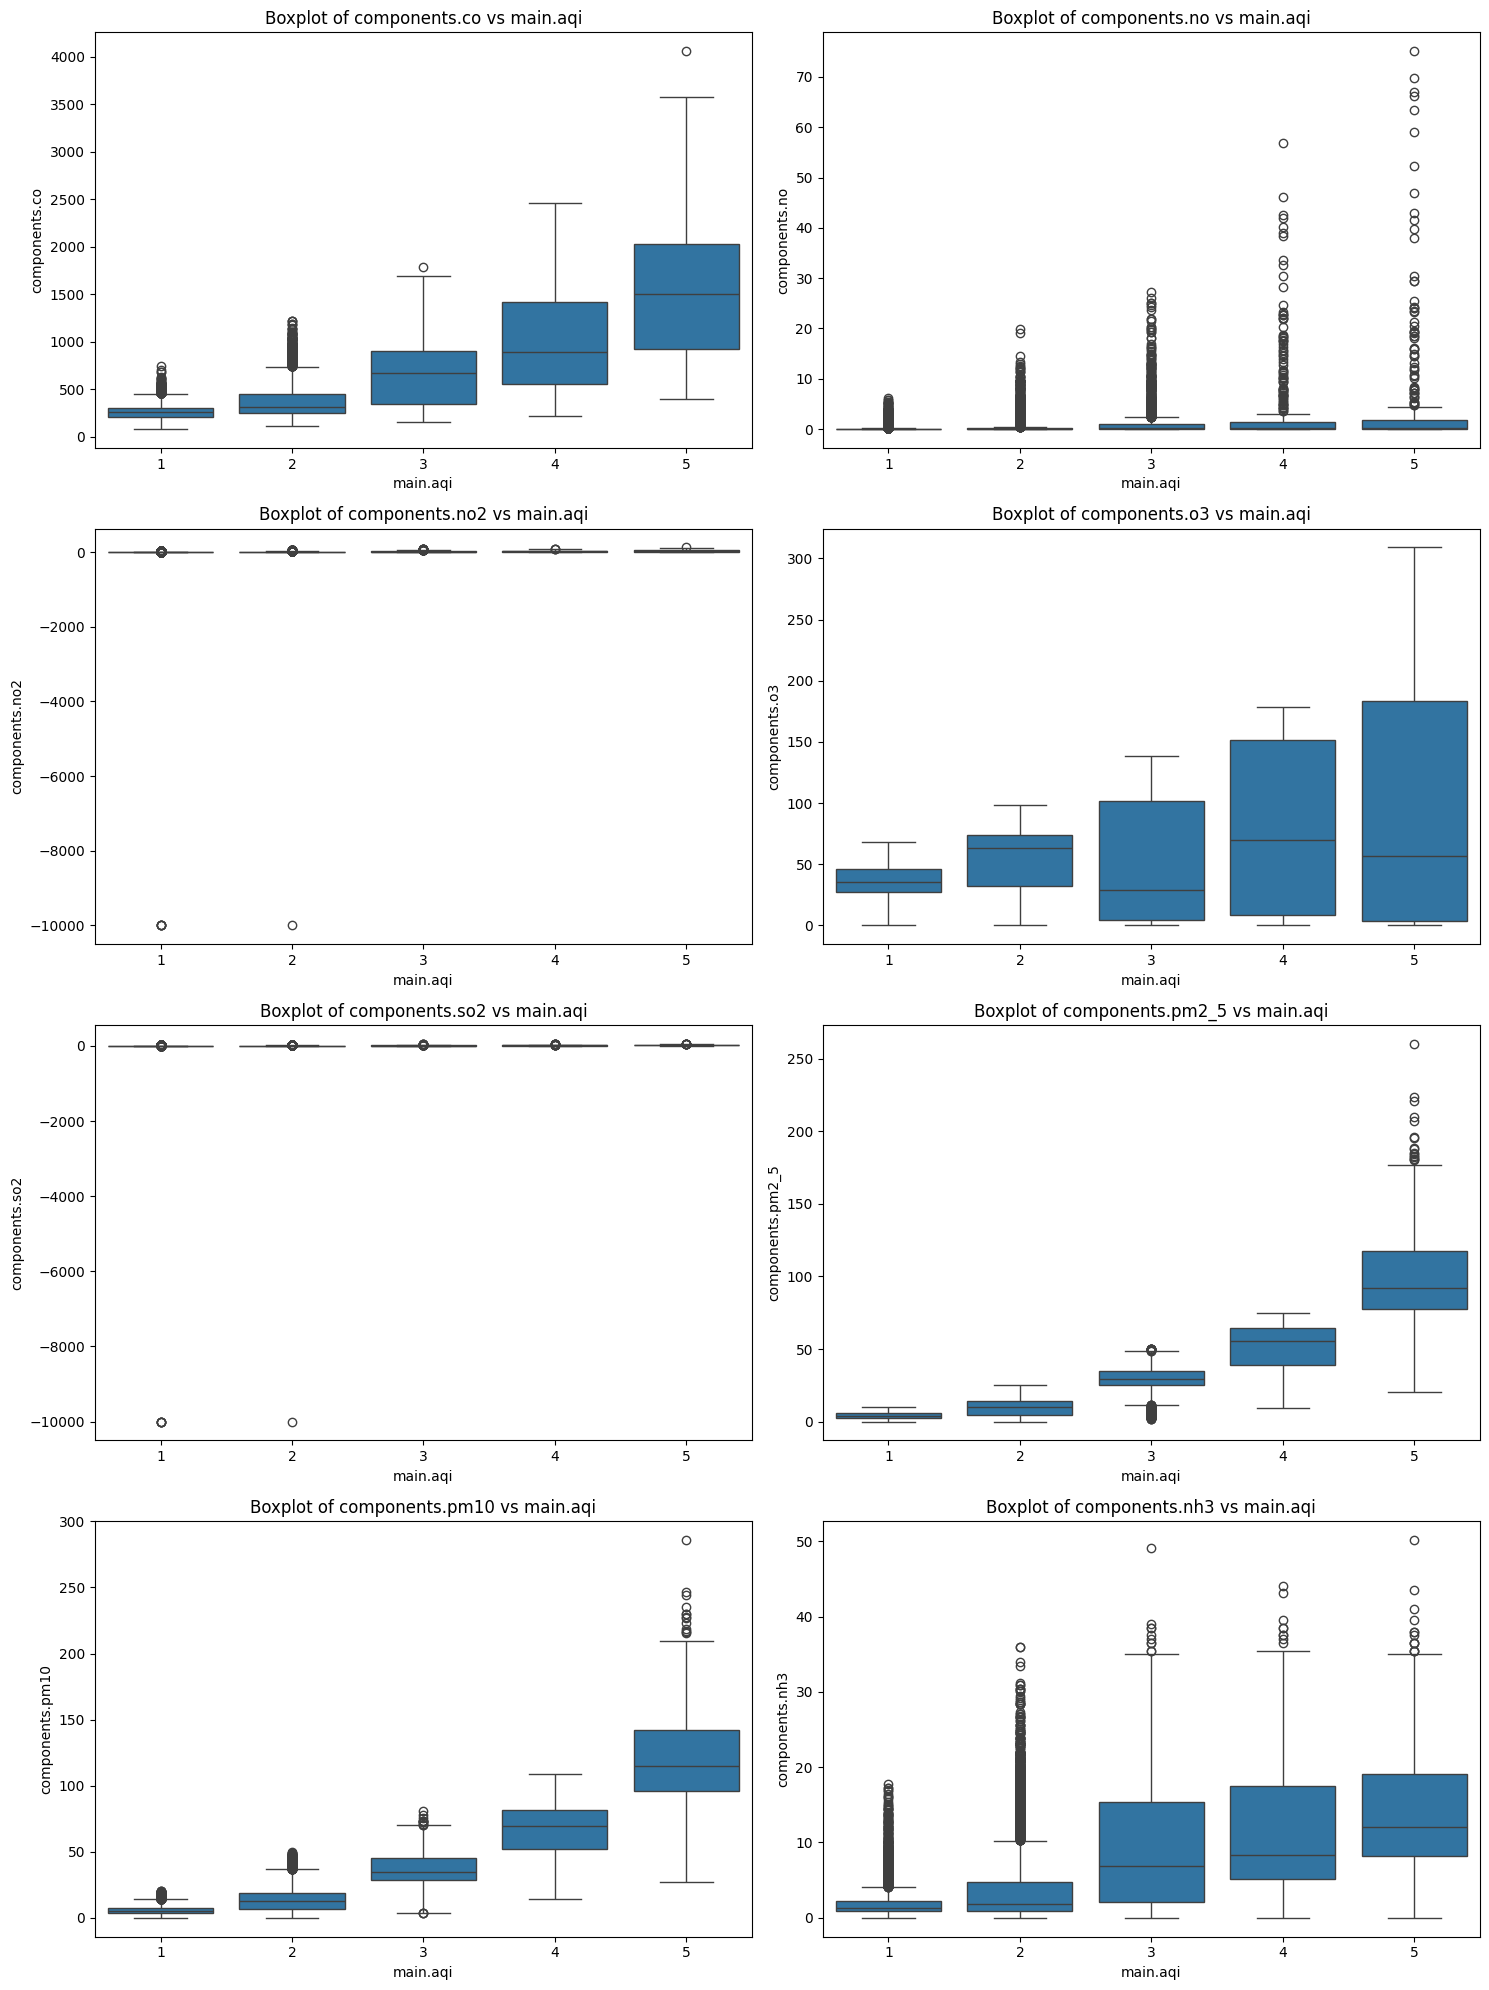

In [ ]:
# Plot boxplots: main.aqi on x-axis, each pollutant on y-axis
plt.figure(figsize=(15, 20))
for i, col in enumerate(pollutant_columns, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x="main.aqi", y=col, data=data)
    plt.title(f"Boxplot of {col} vs main.aqi")
    plt.xlabel("main.aqi")
    plt.ylabel(col)

plt.tight_layout()
plt.show()


##Handle data

Pollutants of SO2 and No2 truns to zero

In [ ]:
for col in pollutant_columns:
    neg_count = (data[col] < 0).sum()
    if neg_count > 0:
        print(f"{col} has {neg_count} negative values")

components.no2 has 6 negative values
components.so2 has 6 negative values


In [ ]:
data1 = data.copy()
for col in pollutant_columns:
    data1[col] = data1[col].clip(lower=0)

Handle the outliers

In [ ]:
data2 = data1.copy()

for col in pollutant_columns:
    Q1 = data2[col].quantile(0.25)
    Q3 = data2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data2[col] = data2[col].clip(lower=lower, upper=upper)

In [ ]:
data2

datetime  main.aqi  components.co  components.no  \
0      2023-11-06 15:52:39+08:00         1         213.62           0.34   
1      2023-11-06 15:53:32+08:00         1         250.34           0.35   
2      2023-11-06 15:54:23+08:00         1         223.64           0.13   
3      2023-11-06 15:54:48+08:00         2         297.07           0.22   
4      2023-11-06 15:54:54+08:00         1         243.66           0.18   
...                          ...       ...            ...            ...   
37620  2025-05-31 23:01:12+08:00         1         186.13           0.14   
37621  2025-05-31 23:02:01+08:00         1         101.46           0.00   
37622  2025-05-31 23:02:23+08:00         1         191.93           0.00   
37623  2025-05-31 23:02:30+08:00         1         103.00           0.00   
37624  2025-05-31 23:02:51+08:00         1         113.17           0.00   

       components.no2  components.o3  components.so2  components.pm2_5  \
0                6.08          56.51            6.56              2.64   
1                3.04          52.93            4.05              5.27   
2                1.48          40.77            0.98              2.66   
3                2.38          42.92            7.21             14.82   
4                1.67          37.55            1.25              4.36   
...               ...            ...             ...               ...   
37620            2.40          29.15            0.55              6.24   
37621            0.10          27.01            0.05              0.97   
37622            2.00          32.70            0.51              6.33   
37623            0.12          27.06            0.05              1.03   
37624            0.68          30.10            0.18              1.00   

       components.pm10  components.nh3  coord.lon  coord.lat      city_name  
0                 3.16            0.97   121.0500    13.7500  Batangas City  
1                 6.96            2.82   123.8907    10.3167      Cebu City  
2                 3.23            1.44   122.5500    10.7500    Iloilo City  
3                15.48            1.49   123.7333    13.1333   Legazpi City  
4                 5.01            1.93   122.5967    10.8794         Lucena  
...                ...             ...        ...        ...            ...  
37620             6.93            4.07   123.8907    10.3167      Cebu City  
37621             1.53            0.01   122.5500    10.7500    Iloilo City  
37622             7.02            3.55   123.7333    13.1333   Legazpi City  
37623             1.59            0.11   122.5967    10.8794         Lucena  
37624             1.49            0.65   120.9822    14.6042         Manila  

[37625 rows x 13 columns]

Drop unnecessary data

In [ ]:
#Drop Coordinates lattitude and longitude
data2.drop(columns=['coord.lat', 'coord.lon'], inplace=True)



In [ ]:
data3= data2.copy()

Extracting datatime column

In [ ]:
data3['datetime'] = pd.to_datetime(data2['datetime'])

# Extract temporal features
data3['year'] = data3['datetime'].dt.year
data3['month'] = data3['datetime'].dt.month
data3['day'] = data3['datetime'].dt.day
data3['hour'] = data3['datetime'].dt.hour
data3['weekday'] = data3['datetime'].dt.day_name()


print(data3[['datetime', 'year', 'month', 'day', 'hour', 'weekday']].head())

                   datetime  year  month  day  hour weekday
0 2023-11-06 15:52:39+08:00  2023     11    6    15  Monday
1 2023-11-06 15:53:32+08:00  2023     11    6    15  Monday
2 2023-11-06 15:54:23+08:00  2023     11    6    15  Monday
3 2023-11-06 15:54:48+08:00  2023     11    6    15  Monday
4 2023-11-06 15:54:54+08:00  2023     11    6    15  Monday


In [ ]:
data3

datetime  main.aqi  components.co  components.no  \
0     2023-11-06 15:52:39+08:00         1         213.62           0.34   
1     2023-11-06 15:53:32+08:00         1         250.34           0.35   
2     2023-11-06 15:54:23+08:00         1         223.64           0.13   
3     2023-11-06 15:54:48+08:00         2         297.07           0.22   
4     2023-11-06 15:54:54+08:00         1         243.66           0.18   
...                         ...       ...            ...            ...   
37620 2025-05-31 23:01:12+08:00         1         186.13           0.14   
37621 2025-05-31 23:02:01+08:00         1         101.46           0.00   
37622 2025-05-31 23:02:23+08:00         1         191.93           0.00   
37623 2025-05-31 23:02:30+08:00         1         103.00           0.00   
37624 2025-05-31 23:02:51+08:00         1         113.17           0.00   

       components.no2  components.o3  components.so2  components.pm2_5  \
0                6.08          56.51            6.56              2.64   
1                3.04          52.93            4.05              5.27   
2                1.48          40.77            0.98              2.66   
3                2.38          42.92            7.21             14.82   
4                1.67          37.55            1.25              4.36   
...               ...            ...             ...               ...   
37620            2.40          29.15            0.55              6.24   
37621            0.10          27.01            0.05              0.97   
37622            2.00          32.70            0.51              6.33   
37623            0.12          27.06            0.05              1.03   
37624            0.68          30.10            0.18              1.00   

       components.pm10  components.nh3      city_name  year  month  day  hour  \
0                 3.16            0.97  Batangas City  2023     11    6    15   
1                 6.96            2.82      Cebu City  2023     11    6    15   
2                 3.23            1.44    Iloilo City  2023     11    6    15   
3                15.48            1.49   Legazpi City  2023     11    6    15   
4                 5.01            1.93         Lucena  2023     11    6    15   
...                ...             ...            ...   ...    ...  ...   ...   
37620             6.93            4.07      Cebu City  2025      5   31    23   
37621             1.53            0.01    Iloilo City  2025      5   31    23   
37622             7.02            3.55   Legazpi City  2025      5   31    23   
37623             1.59            0.11         Lucena  2025      5   31    23   
37624             1.49            0.65         Manila  2025      5   31    23   

        weekday  
0        Monday  
1        Monday  
2        Monday  
3        Monday  
4        Monday  
...         ...  
37620  Saturday  
37621  Saturday  
37622  Saturday  
37623  Saturday  
37624  Saturday  

[37625 rows x 16 columns]

Before and After Skewness and Kurtosis

In [ ]:
results = []

for col in pollutant_columns:
    before_skew = skew(data[col])
    before_kurt = kurtosis(data[col])
    after_skew = skew(data3[col])
    after_kurt = kurtosis(data3[col])

    results.append({
        'Attribute': col,
        'Skewness (Before)': round(before_skew, 2),
        'Kurtosis (Before)': round(before_kurt, 2),
        'Skewness (After)': round(after_skew, 2),
        'Kurtosis (After)': round(after_kurt, 2)})

summary_df = pd.DataFrame(results)
summary_df.index = range(1, len(summary_df) + 1)

pd.options.display.float_format = '{:,.2f}'.format
display(summary_df)


Attribute  Skewness (Before)  Kurtosis (Before)  Skewness (After)  \
1     components.co               4.25              29.69              0.59   
2     components.no              18.46             507.25              1.19   
3    components.no2             -78.66           6,212.49              1.19   
4     components.o3               1.50               6.58              0.44   
5    components.so2             -79.01           6,248.80              1.12   
6  components.pm2_5               6.04              55.89              1.09   
7   components.pm10               5.40              44.06              1.09   
8    components.nh3               3.53              15.53              1.11   

   Kurtosis (After)  
1             -0.30  
2             -0.04  
3              0.12  
4             -0.17  
5              0.42  
6             -0.03  
7              0.02  
8             -0.07

Summary Statstics

In [ ]:
data3[pollutant_columns].describe()

components.co  components.no  components.no2  components.o3  \
count      37,625.00      37,625.00       37,625.00      37,625.00   
mean          300.29           0.09            4.67          42.79   
std           118.87           0.12            4.55          23.53   
min            82.40           0.00            0.00           0.00   
25%           230.31           0.00            1.37          26.46   
50%           280.38           0.03            2.59          40.41   
75%           353.81           0.14            6.77          57.36   
max           539.06           0.35           14.87         103.71   

       components.so2  components.pm2_5  components.pm10  components.nh3  
count       37,625.00         37,625.00        37,625.00       37,625.00  
mean             3.87              7.04             9.53            2.28  
std              3.64              5.31             7.13            1.89  
min              0.00              0.00             0.00            0.00  
25%              0.84              3.16             4.24            0.93  
50%              2.77              5.05             6.94            1.51  
75%              5.84              9.31            12.64            3.07  
max             13.34             18.54            25.24            6.28

Change city name to numeric

In [ ]:
#Change city_name to numeric forms (for RFmodel)
data4 = data3.copy()
city_mapping = {
    'Batangas City': 1,
    'Cebu City': 2,
    'Iloilo City': 3,
    'Legazpi City': 4,
    'Lucena': 5,
    'Manila': 6,}

data4['city_name'] = data4['city_name'].map(city_mapping)

##Data visualization

Average Pollutant Levels by City

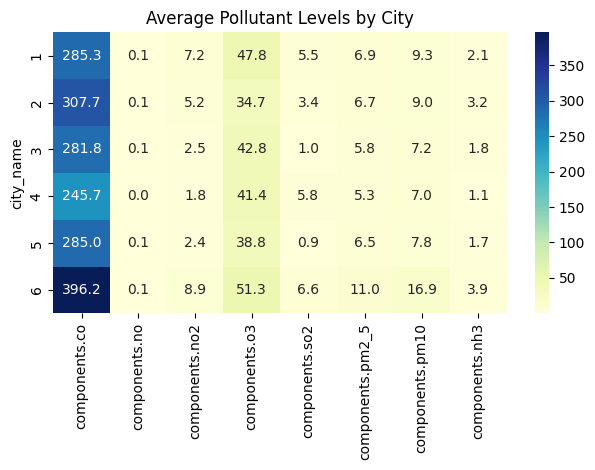

In [ ]:
heat_data = data4.groupby("city_name")[pollutant_columns].mean()
sns.heatmap(heat_data, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Average Pollutant Levels by City")
plt.tight_layout()
plt.show()

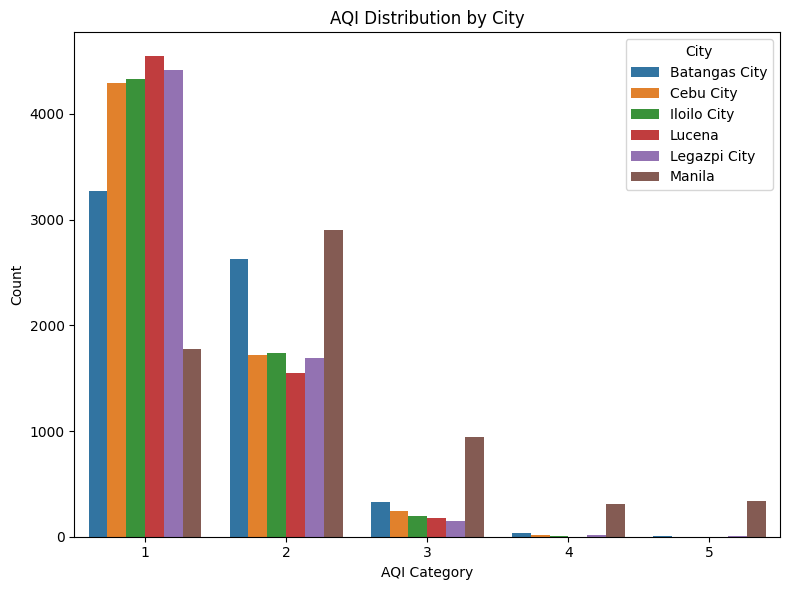

In [ ]:
# Count plot of AQI by city
plt.figure(figsize=(8, 6))
sns.countplot(x='main.aqi', hue='city_name', data=data2)
plt.title('AQI Distribution by City')
plt.xlabel('AQI Category')
plt.ylabel('Count')
plt.legend(title='City')
plt.tight_layout()
plt.show()


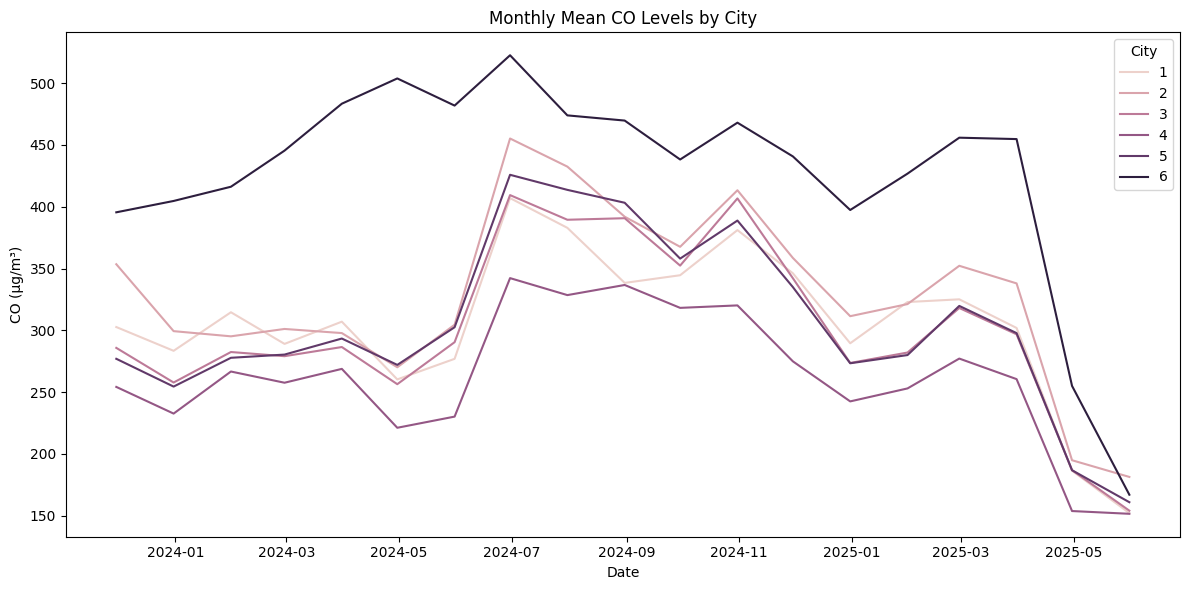

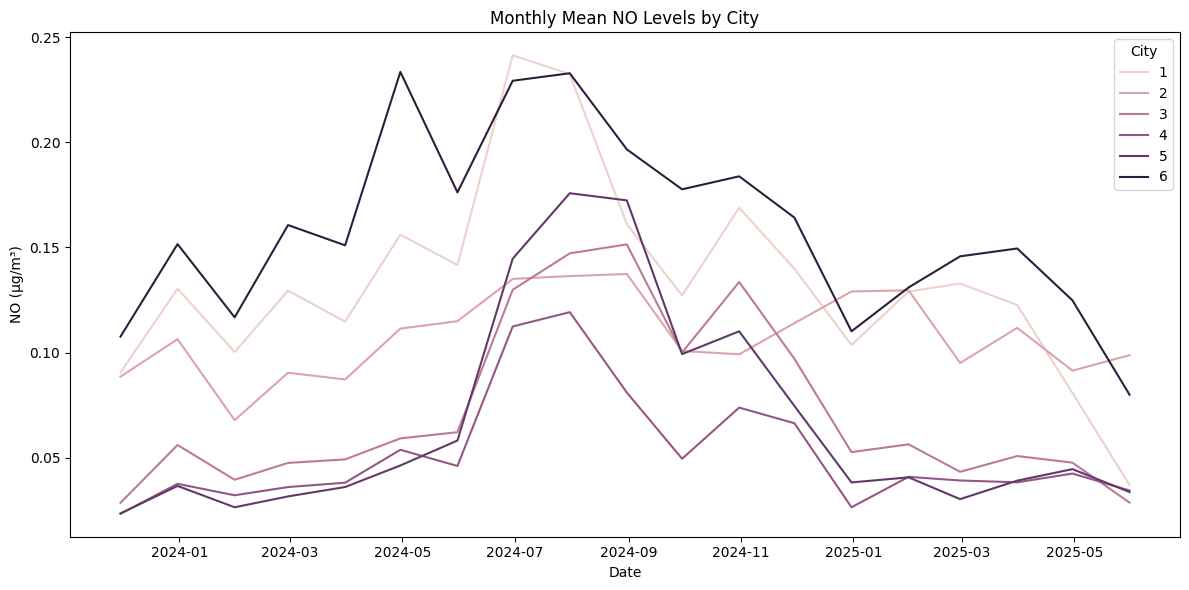

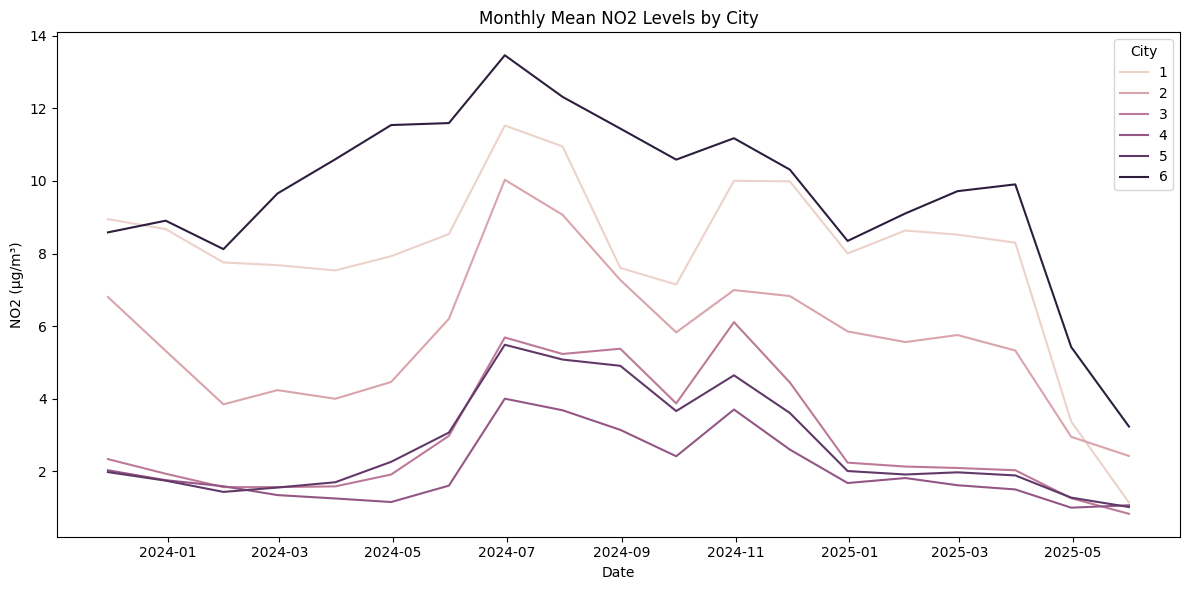

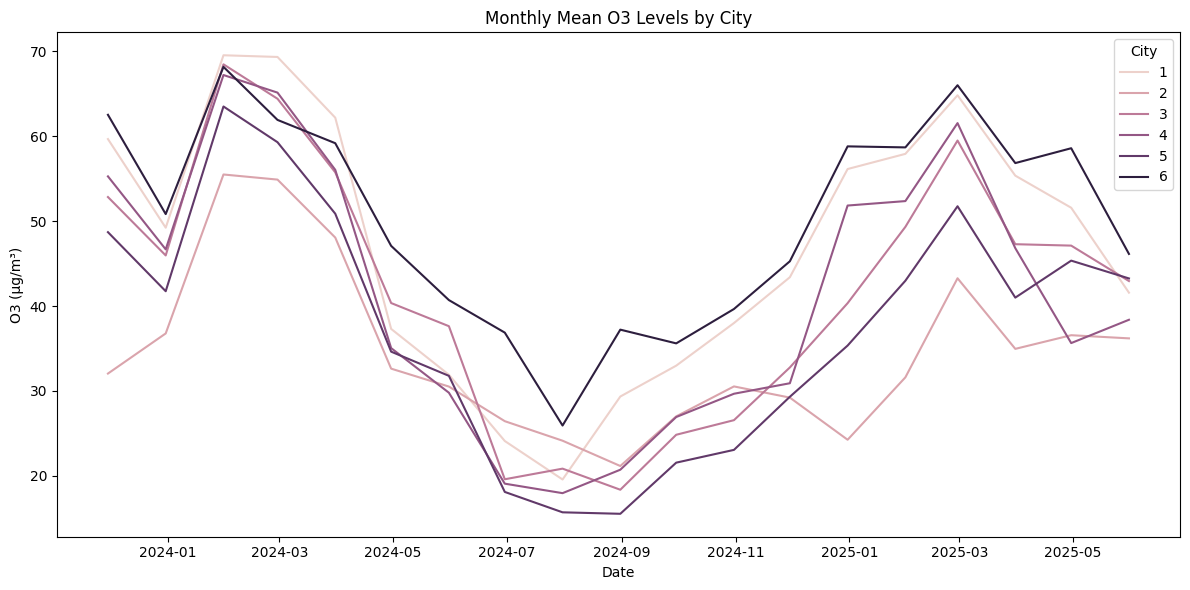

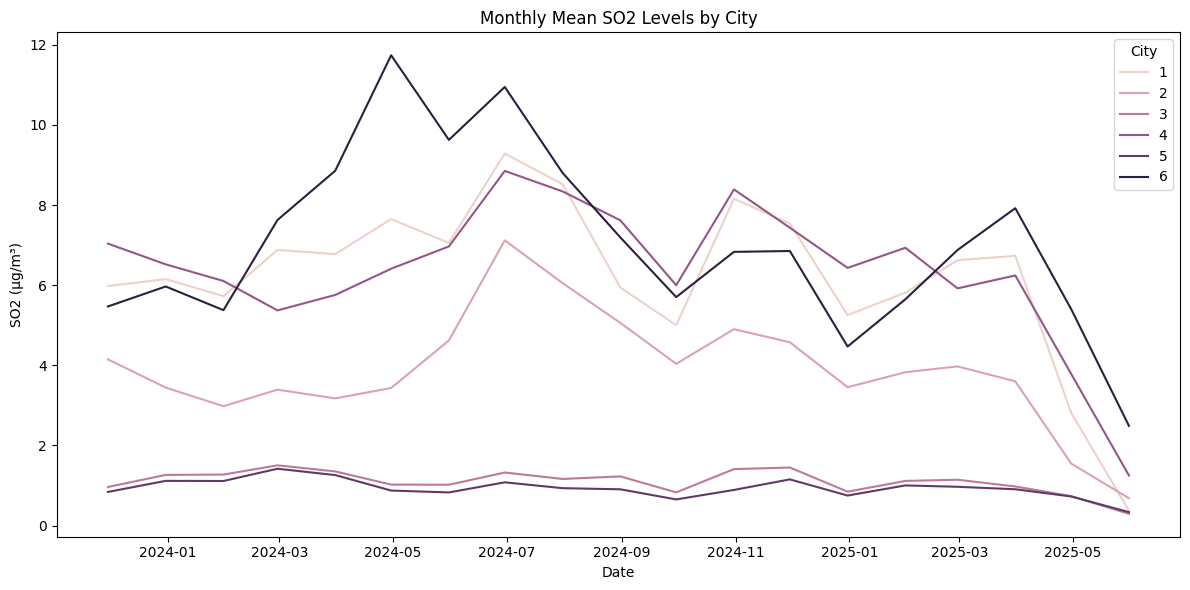

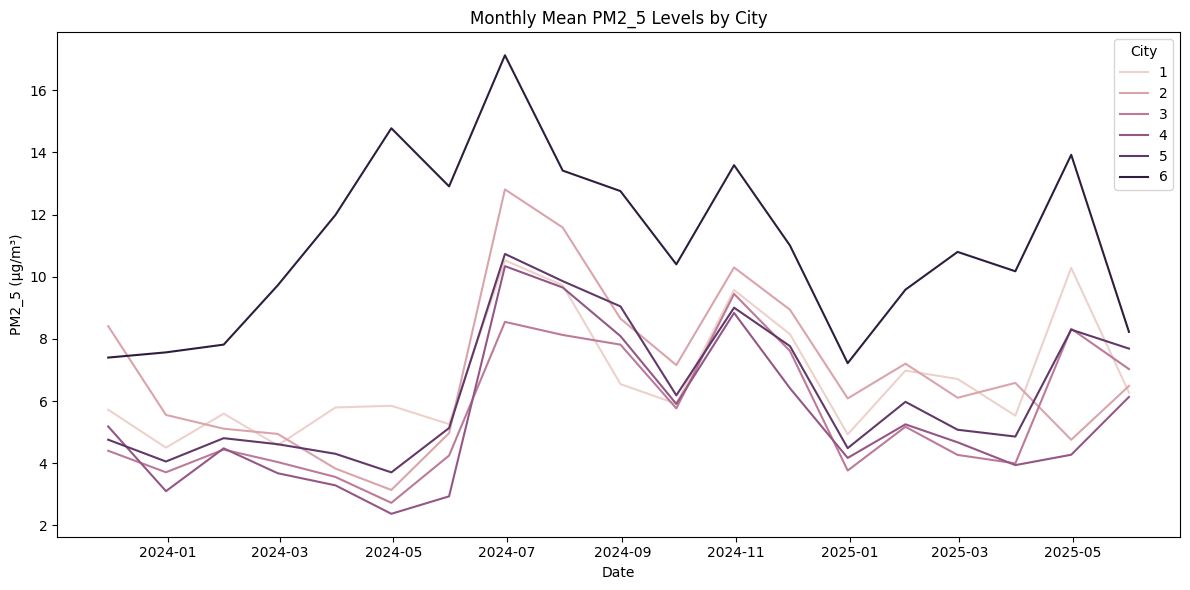

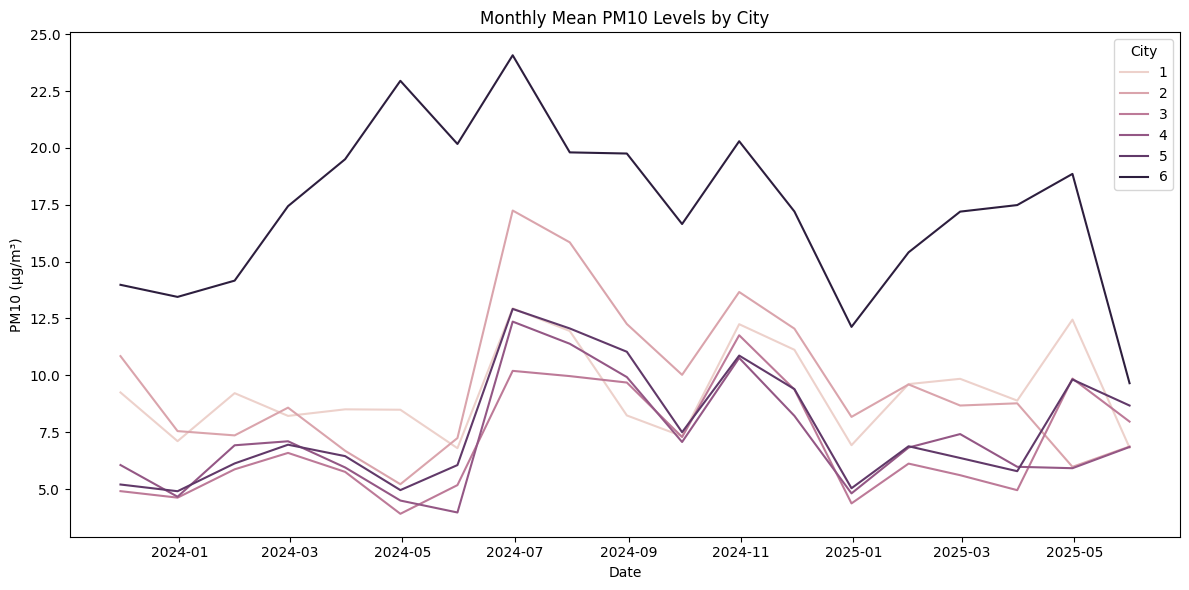

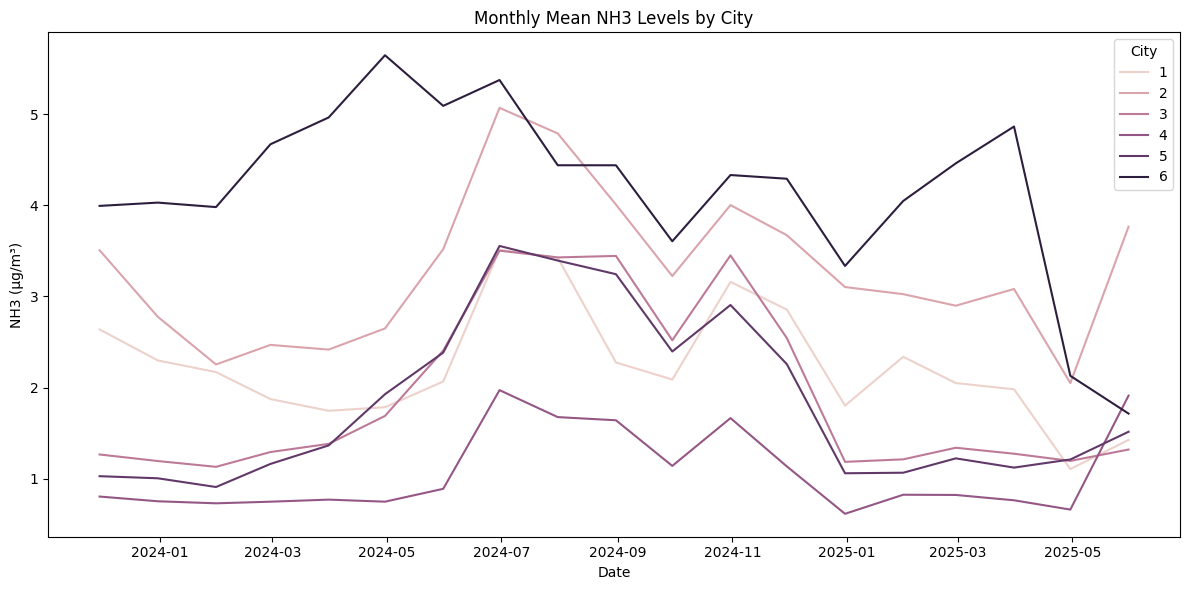

In [ ]:
# Monthly average by city
for pol in pollutant_columns:
    monthly_data = data4.groupby([
        pd.Grouper(key='datetime', freq='M'), 'city_name'
    ])[pol].mean().reset_index()

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=monthly_data, x='datetime', y=pol, hue='city_name')
    plt.title(f"Monthly Mean {pol.split('.')[-1].upper()} Levels by City")
    plt.xlabel("Date")
    plt.ylabel(f"{pol.split('.')[-1].upper()} (μg/m³)")
    plt.legend(title="City")
    plt.tight_layout()
    plt.show()

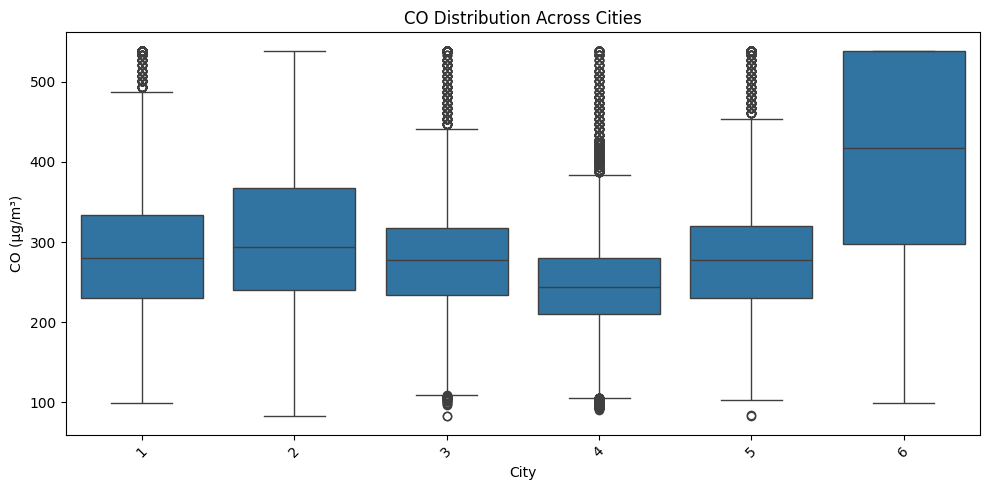

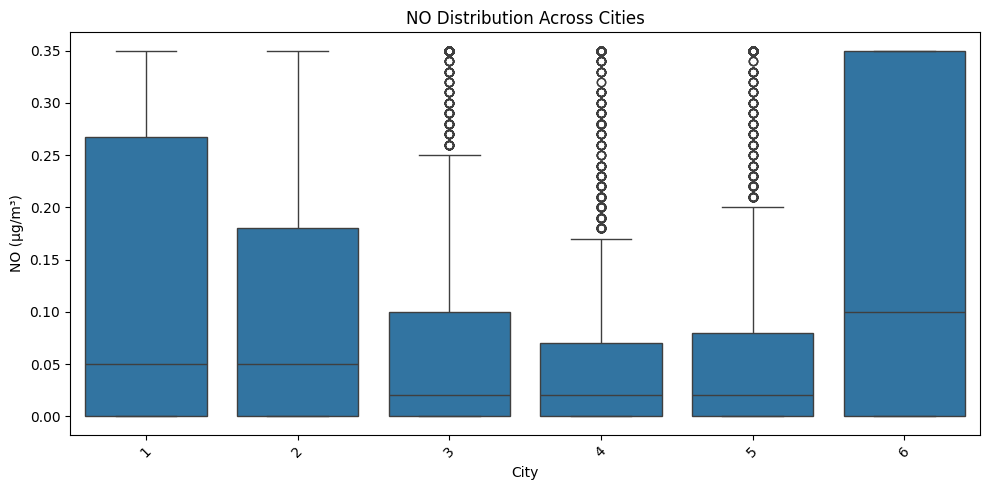

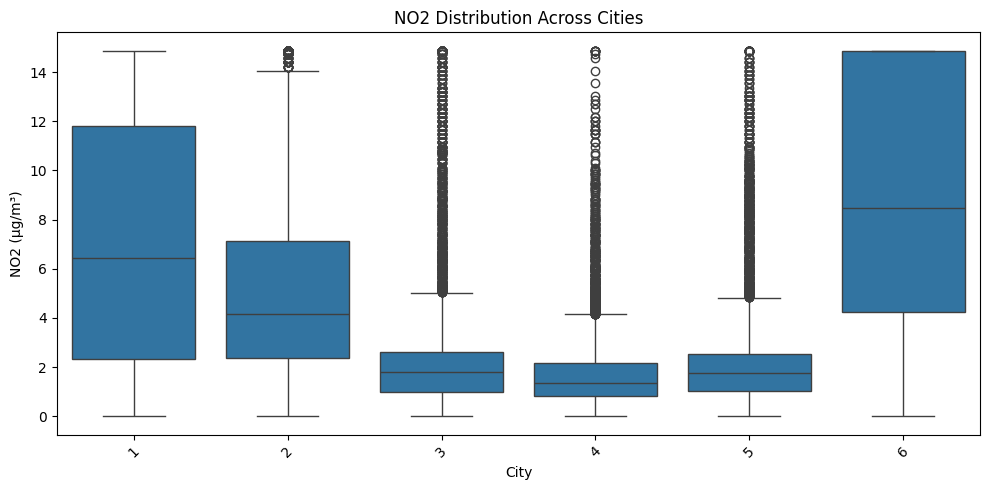

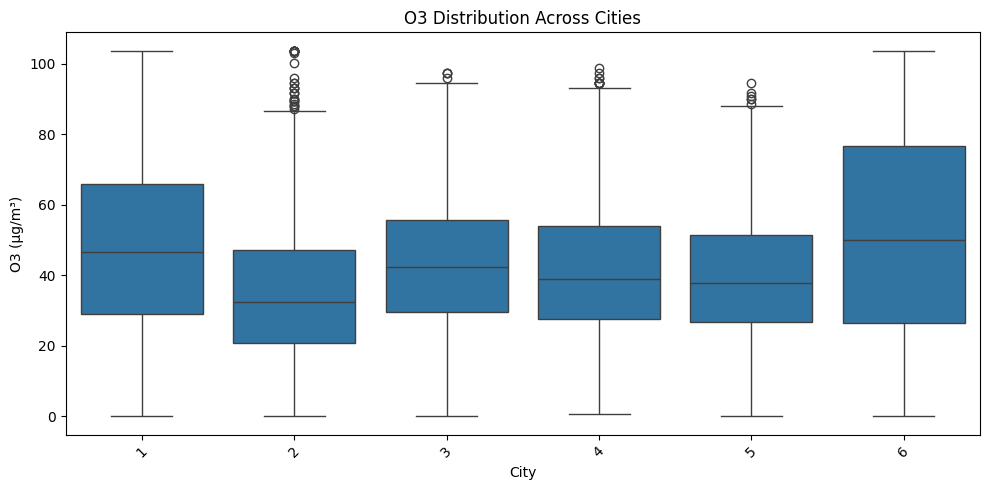

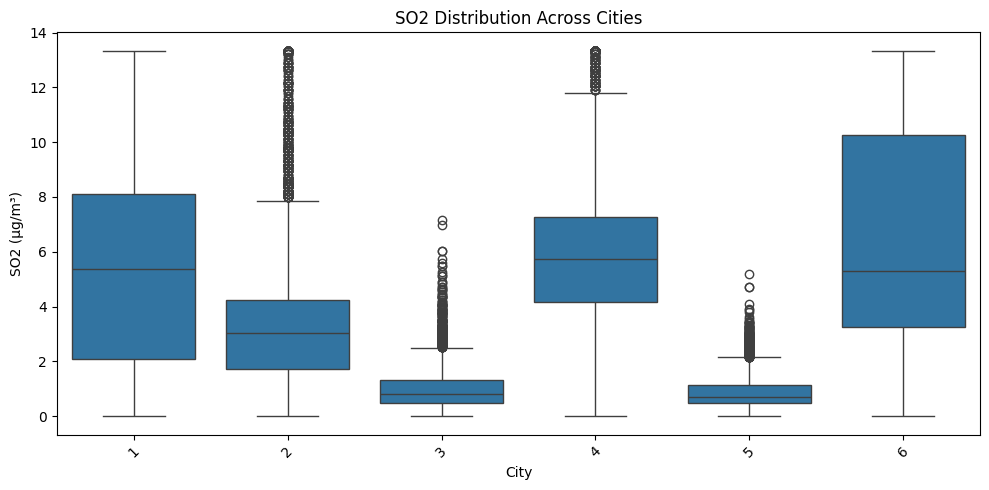

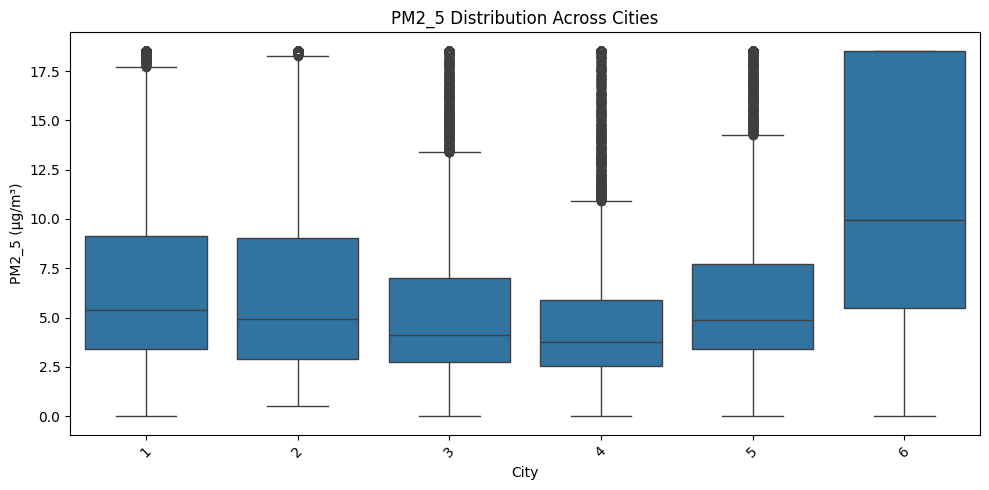

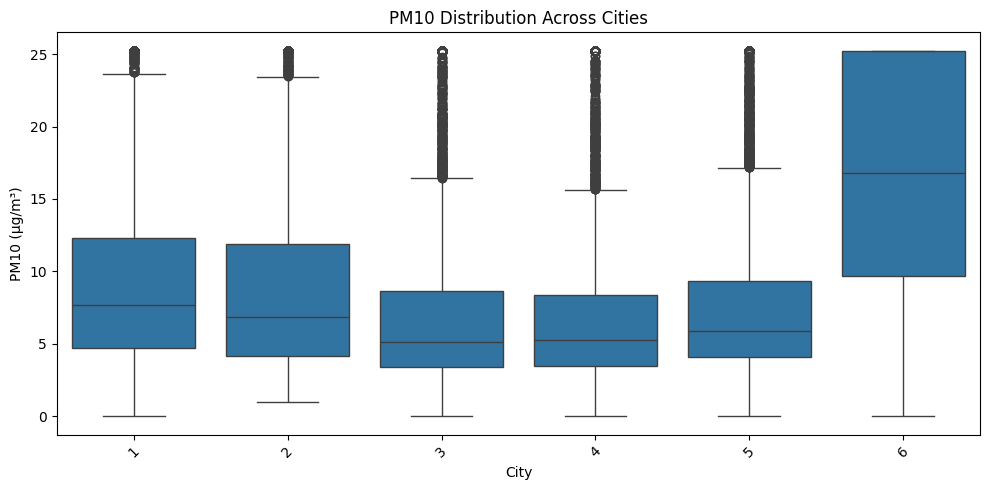

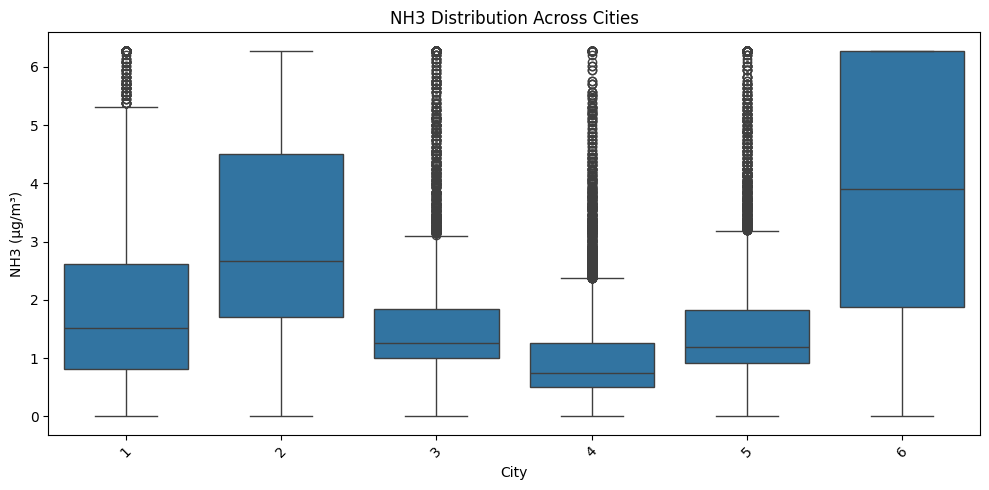

In [ ]:
for pol in pollutant_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data4, x='city_name', y=pol)
    plt.title(f"{pol.split('.')[-1].upper()} Distribution Across Cities")
    plt.xlabel("City")
    plt.ylabel(f"{pol.split('.')[-1].upper()} (µg/m³)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Balance the data

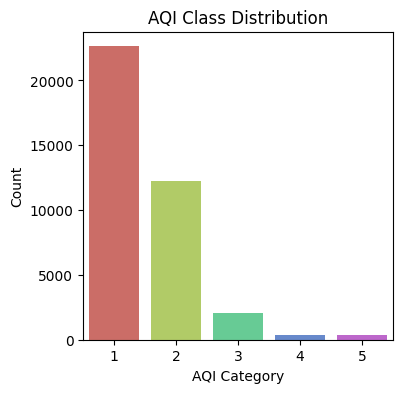

In [ ]:
plt.figure(figsize=(4, 4))
sns.countplot(x='main.aqi', data=data4, palette='hls')
plt.title('AQI Class Distribution')
plt.xlabel('AQI Category')
plt.ylabel('Count')

plt.savefig('main_aqi_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
X = data4[['components.co', 'components.no', 'components.no2', 'components.o3',
           'components.so2', 'components.pm2_5', 'components.pm10', 'components.nh3',"hour", "day", "month", "city_name"]]

y = data4['main.aqi']



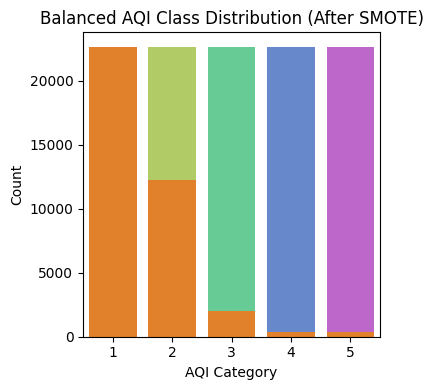

Counter({1: 22631, 2: 22631, 3: 22631, 4: 22631, 5: 22631})


In [ ]:
X_b, y_b = SMOTE(random_state=42).fit_resample(X, y)

plt.figure(figsize=(4, 4))
sns.countplot(x=y_b, palette='hls')
plt.title("Balanced AQI Class Distribution (After SMOTE)")
plt.xlabel("AQI Category")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig('balanced_aqi_distribution.png', dpi=300, bbox_inches='tight')
sns.countplot(x='main.aqi', data=data2)
plt.savefig('main_aqi_distribution.png')
plt.show()

print(Counter(y_b))

In [ ]:
X_b.shape

(113155, 12)

In [ ]:
y.head(6)

0    1
1    1
2    1
3    2
4    1
5    2
Name: main.aqi, dtype: int64

##First model: Random Forest Model

Random Forest Model1 : Cross Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_b, y_b, test_size=0.2, random_state=42, stratify=y_b)

rf_model_1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_1.fit(X_train, y_train)

cv_scores_rf1 = cross_val_score(rf_model_1, X_train, y_train, cv=5)
print("Model 1: Random Forest with Cross-Validation")
print(f"Cross-Validation Accuracy Scores: {cv_scores_rf1}")
print(f"Mean CV Accuracy: {cv_scores_rf1.mean():.4f}")

# Predict and evaluate
y_pred_rf1 = rf_model_1.predict(X_test)

print("\nClassification Report - Model 1 (Random Forest):")
print(classification_report(y_test, y_pred_rf1, digits=4))



Model 1: Random Forest with Cross-Validation
Cross-Validation Accuracy Scores: [0.98580503 0.98668876 0.98619166 0.98696493 0.9861909 ]
Mean CV Accuracy: 0.9864

Classification Report - Model 1 (Random Forest):
              precision    recall  f1-score   support

           1     0.9991    0.9993    0.9992      4526
           2     0.9975    0.9750    0.9861      4526
           3     0.9749    0.9856    0.9802      4526
           4     0.9836    0.9932    0.9883      4527
           5     0.9912    0.9927    0.9919      4526

    accuracy                         0.9892     22631
   macro avg     0.9893    0.9892    0.9892     22631
weighted avg     0.9893    0.9892    0.9892     22631



Confusion Matrix - Model 1 (Random Forest):
[[4523    3    0    0    0]
 [   4 4413  106    2    1]
 [   0    4 4461   45   16]
 [   0    1    7 4496   23]
 [   0    3    2   28 4493]]

Test Accuracy - Model 1: 0.9892
Weighted F1 Score - Model 1: 0.9892


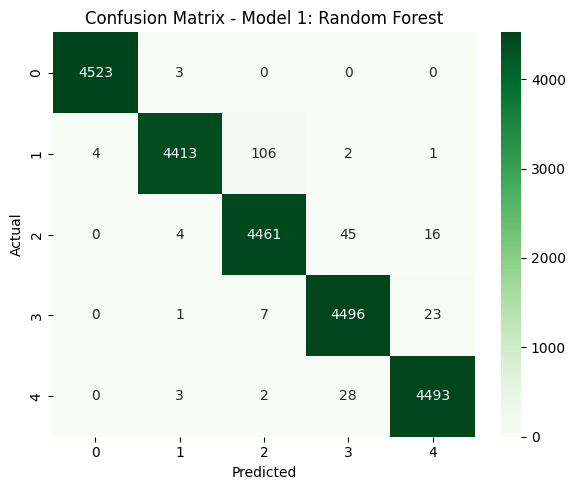

In [ ]:
print("Confusion Matrix - Model 1 (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf1))

accuracy_rf1 = accuracy_score(y_test, y_pred_rf1)
f1_rf1 = f1_score(y_test, y_pred_rf1, average='weighted')

print(f"\nTest Accuracy - Model 1: {accuracy_rf1:.4f}")
print(f"Weighted F1 Score - Model 1: {f1_rf1:.4f}")

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf1), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Model 1: Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


ROC curve for Random Forest Model 1

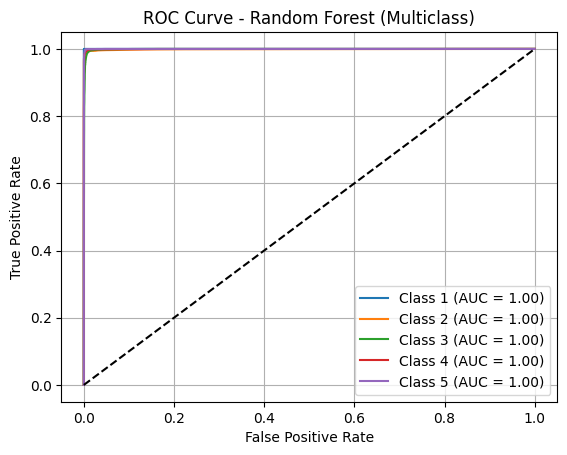

In [ ]:
classes = sorted(y_b.unique())
y_test_bin = label_binarize(y_test, classes=classes)
y_score = rf_model_1.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Random Forest Model 1 (Multiclass)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Feature importances for Random Forest Model 1

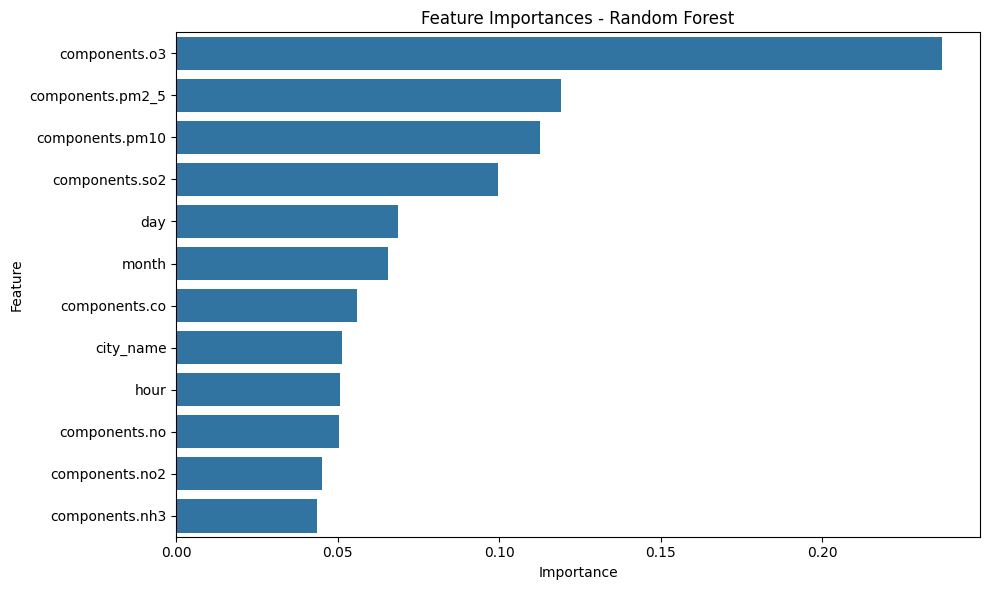

In [ ]:
# Get feature importances
importances = rf_model_1.feature_importances_
feature_names = X_b.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances - Random Forest Model 1')
plt.tight_layout()
plt.show()


 Learning curve for Random Forest Model 1

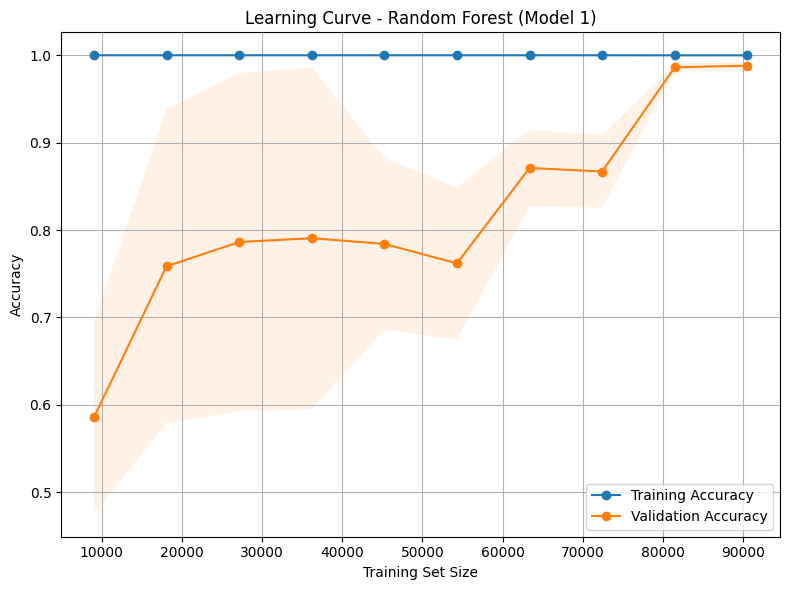

In [ ]:
# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    estimator=rf_model_1,
    X=X_b,
    y=y_b,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy',
    n_jobs=-1,
   random_state=42)

# Compute mean and std
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Validation Accuracy')
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(train_sizes,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)

plt.title('Learning Curve - Random Forest (Model 1)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


Radom Forest Model2 : Hyper parameter Tunning


Fitting 5 folds for each of 16 candidates, totalling 80 fits
 Model 2: Random Forest with Hyperparameter Tuning (Reduced Grid)
Best Hyperparameters:
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

 Classification Report - Model 2:
              precision    recall  f1-score   support

           1     0.9991    1.0000    0.9996      4526
           2     0.9980    0.9788    0.9883      4526
           3     0.9781    0.9887    0.9834      4526
           4     0.9866    0.9929    0.9898      4527
           5     0.9925    0.9936    0.9930      4526

    accuracy                         0.9908     22631
   macro avg     0.9909    0.9908    0.9908     22631
weighted avg     0.9909    0.9908    0.9908     22631


 Confusion Matrix - Model 2:
[[4526    0    0    0    0]
 [   4 4430   88    3    1]
 [   0    4 4475   34   13]
 [   0    2   10 4495   20]
 [   0    3    2   24 4497]]

 Test Accuracy - Model 2: 0.9908
 Weighted F1 S

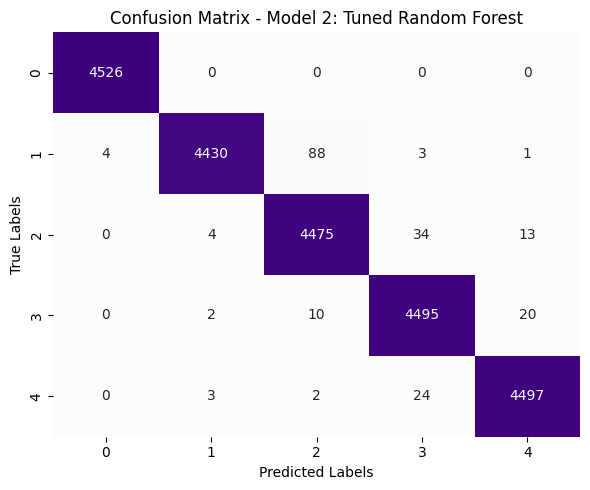

In [ ]:
param_grid_rf2 = {
    'n_estimators': [100],
    'max_depth': [10, None],
    'min_samples_split': [2,3],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True,False]}

grid_rf2 = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf2,
    cv=5,
    n_jobs=-1,
    verbose=1)

grid_rf2.fit(X_train, y_train)
best_rf2 = grid_rf2.best_estimator_

y_pred_rf2 = best_rf2.predict(X_test)
accuracy_rf2 = accuracy_score(y_test, y_pred_rf2)
f1_rf2 = f1_score(y_test, y_pred_rf2, average='weighted')
conf_matrix_rf2 = confusion_matrix(y_test, y_pred_rf2)
report_rf2 = classification_report(y_test, y_pred_rf2, digits=4)

print(" Model 2: Random Forest with Hyperparameter Tuning (Reduced Grid)")
print("Best Hyperparameters:")
print(grid_rf2.best_params_)

print("\n Classification Report - Model 2:")
print(report_rf2)
print("\n Confusion Matrix - Model 2:")
print(conf_matrix_rf2)
print(f"\n Test Accuracy - Model 2: {accuracy_rf2:.4f}")
print(f" Weighted F1 Score - Model 2: {f1_rf2:.4f}")

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf2, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title("Confusion Matrix - Model 2: Tuned Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

ROC Curve for Random Forest Model 2



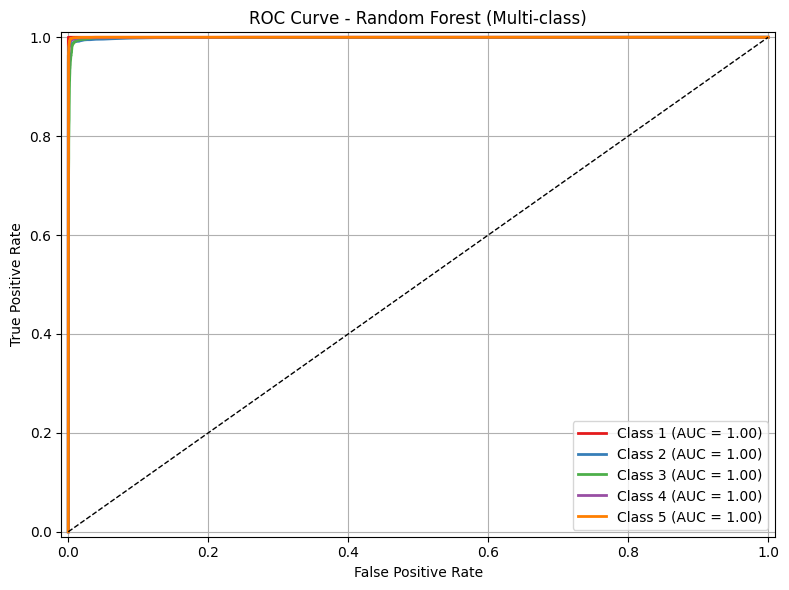

In [ ]:
classes = [1, 2, 3, 4, 5]
y_test_bin = label_binarize(y_test, classes=classes)

ovr_rf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
ovr_rf.fit(X_train, label_binarize(y_train, classes=classes))
y_score = ovr_rf.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = sns.color_palette("Set1", len(classes))
for i, color in zip(range(len(classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Multi-class)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

Learning Curve for Random Forest Model 2

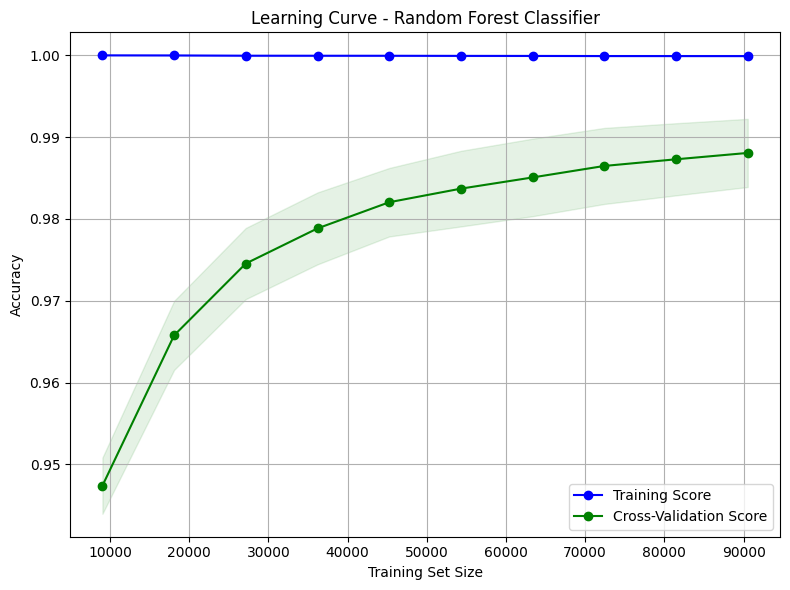

In [ ]:
rf_model_2  = RandomForestClassifier(n_estimators=100, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    rf_model_2 , X_b, y_b, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-Validation Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
plt.title("Learning Curve - Random Forest Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

Feature Importance for Random Forest Model 2

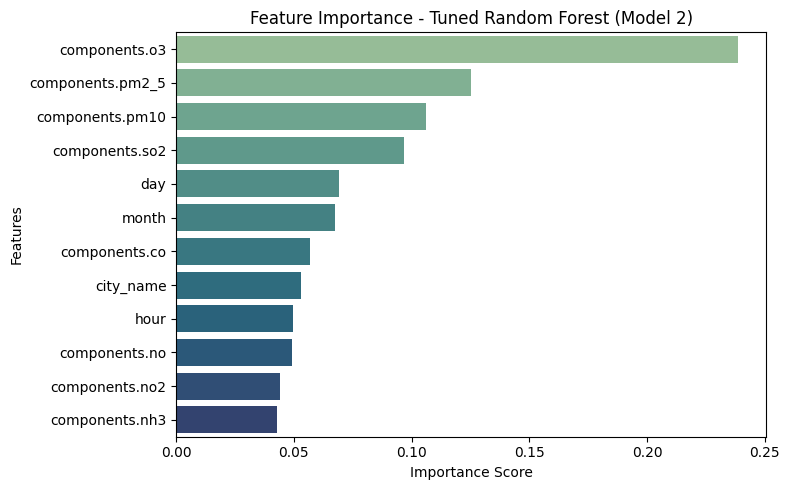

In [ ]:
importances = best_rf2.feature_importances_
feature_names = X_train.columns
feature_series = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_series, y=feature_series.index, palette="crest")
plt.title("Feature Importance - Tuned Random Forest (Model 2)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

#Save the RF model file

In [ ]:
joblib.dump(rf_model_1, "rf_model_1.pkl")


['rf_model_1.pkl']

In [ ]:
joblib.dump(best_rf2, "rf_model_2_tuned.pkl")

## Second Model : Gradient Boosting Model

Gardient Boosting Model1 : Cross Validation

In [ ]:
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(
    X_b, y_b, test_size=0.2, random_state=42, stratify=y_b)

gb_model_1 = GradientBoostingClassifier(random_state=42)
gb_model_1.fit(X_train_gb, y_train_gb)

cv_scores_gb1 = cross_val_score(gb_model_1, X_train_gb, y_train_gb, cv=5)
print(" Model 1: Gradient Boosting with Cross-Validation")
print(f"Cross-Validation Accuracy Scores: {cv_scores_gb1}")
print(f"Mean CV Accuracy: {cv_scores_gb1.mean():.4f}")

y_pred_gb1 = gb_model_1.predict(X_test_gb)

accuracy_gb1 = accuracy_score(y_test_gb, y_pred_gb1)
f1_gb1 = f1_score(y_test_gb, y_pred_gb1, average='weighted')
conf_matrix_gb1 = confusion_matrix(y_test_gb, y_pred_gb1)
report_gb1 = classification_report(y_test_gb, y_pred_gb1, digits=4)

print("\n Classification Report - Model 1 (Gradient Boosting):")
print(report_gb1)


 Model 1: Gradient Boosting with Cross-Validation
Cross-Validation Accuracy Scores: [0.88925711 0.88831814 0.88412041 0.88798674 0.88875387]
Mean CV Accuracy: 0.8877

 Classification Report - Model 1 (Gradient Boosting):
              precision    recall  f1-score   support

           1     0.9991    1.0000    0.9996      4526
           2     0.9941    0.9609    0.9772      4526
           3     0.8770    0.8352    0.8556      4526
           4     0.7607    0.7590    0.7598      4527
           5     0.8112    0.8780    0.8433      4526

    accuracy                         0.8866     22631
   macro avg     0.8884    0.8866    0.8871     22631
weighted avg     0.8884    0.8866    0.8871     22631




 Confusion Matrix - Model 1 (Gradient Boosting):
[[4526    0    0    0    0]
 [   4 4349  152   20    1]
 [   0    9 3780  592  145]
 [   0   16  296 3436  779]
 [   0    1   82  469 3974]]

 Test Accuracy - Model 1: 0.8866
 Weighted F1 Score - Model 1: 0.8871


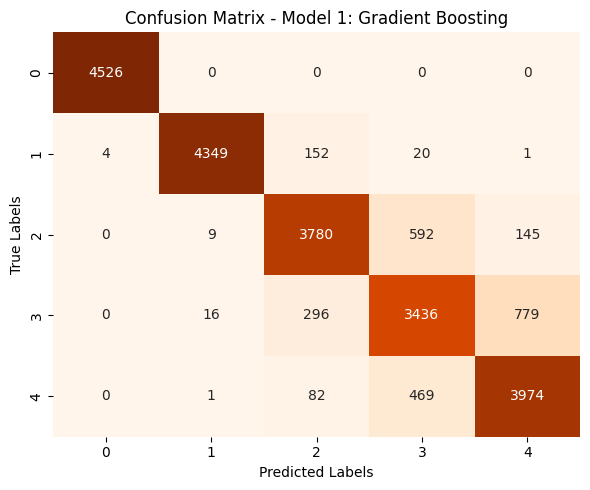

In [ ]:
print("\n Confusion Matrix - Model 1 (Gradient Boosting):")
print(conf_matrix_gb1)
print(f"\n Test Accuracy - Model 1: {accuracy_gb1:.4f}")
print(f" Weighted F1 Score - Model 1: {f1_gb1:.4f}")

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_gb1, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title("Confusion Matrix - Model 1: Gradient Boosting")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

Learning Curve for Gradient Boosting Model 1

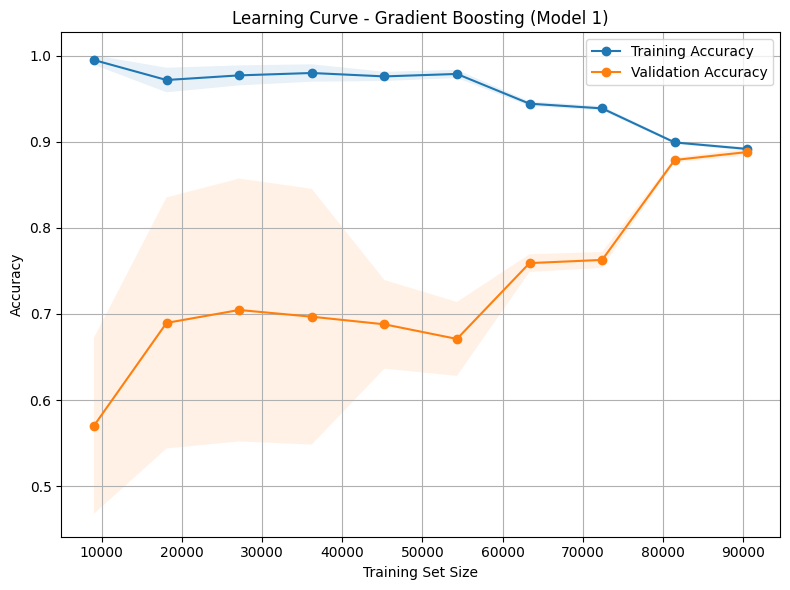

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes_gb, train_scores_gb, test_scores_gb = learning_curve(
    estimator=gb_model_1,
    X=X_b,
    y=y_b,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

train_mean_gb = np.mean(train_scores_gb, axis=1)
test_mean_gb = np.mean(test_scores_gb, axis=1)
train_std_gb = np.std(train_scores_gb, axis=1)
test_std_gb = np.std(test_scores_gb, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes_gb, train_mean_gb, 'o-', label='Training Accuracy')
plt.plot(train_sizes_gb, test_mean_gb, 'o-', label='Validation Accuracy')
plt.fill_between(train_sizes_gb, train_mean_gb - train_std_gb, train_mean_gb + train_std_gb, alpha=0.1)
plt.fill_between(train_sizes_gb, test_mean_gb - test_std_gb, test_mean_gb + test_std_gb, alpha=0.1)

plt.title('Learning Curve - Gradient Boosting (Model 1)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


ROC Curve for Gradient Boosting Model 1

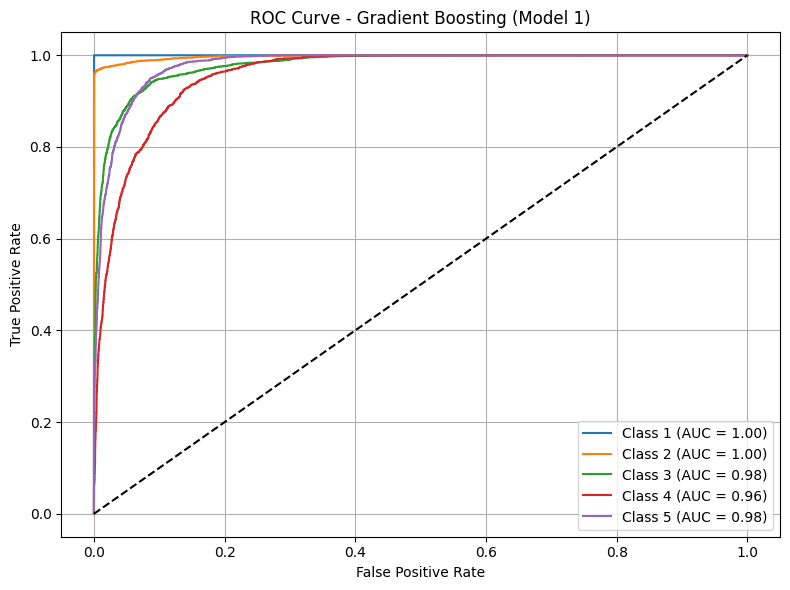

In [ ]:
# Binarize test labels for ROC
classes = sorted(y_b.unique())
y_test_bin_gb = label_binarize(y_test_gb, classes=classes)
y_score_gb = gb_model_1.predict_proba(X_test_gb)

fpr_gb, tpr_gb, roc_auc_gb = {}, {}, {}
for i in range(len(classes)):
    fpr_gb[i], tpr_gb[i], _ = roc_curve(y_test_bin_gb[:, i], y_score_gb[:, i])
    roc_auc_gb[i] = auc(fpr_gb[i], tpr_gb[i])

# Plot ROC
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    plt.plot(fpr_gb[i], tpr_gb[i], label=f'Class {classes[i]} (AUC = {roc_auc_gb[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Gradient Boosting (Model 1)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


Feature Importance for Garident Boost Model1

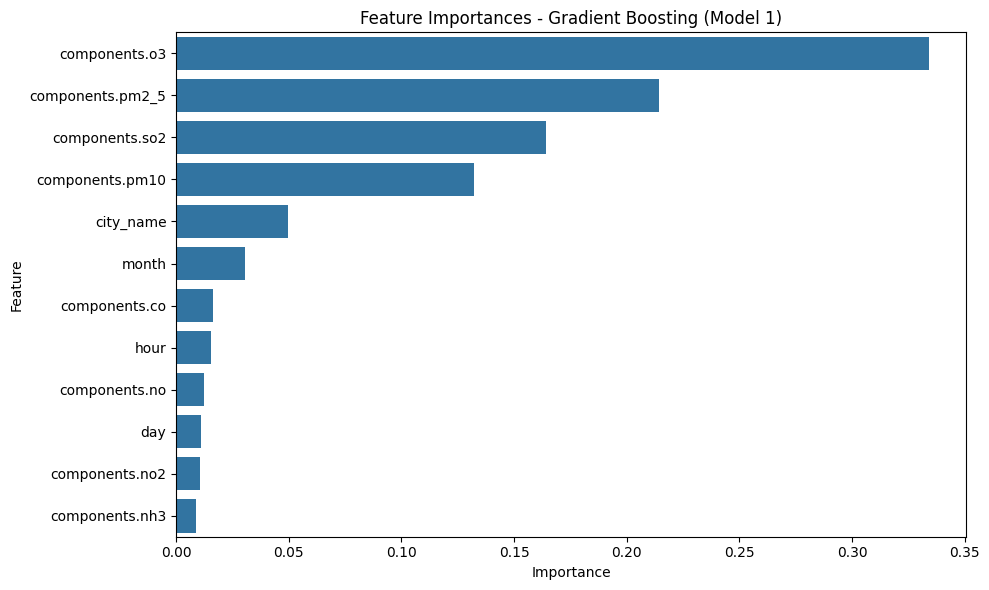

In [ ]:
importances_gb = gb_model_1.feature_importances_
features_gb = X_b.columns

importance_df_gb = pd.DataFrame({
    'Feature': features_gb,
    'Importance': importances_gb
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_gb)
plt.title('Feature Importances - Gradient Boosting (Model 1)')
plt.tight_layout()
plt.show()


##Gardient Boosting Model2 : Hyperparameter Tunning

Fitting 5 folds for each of 32 candidates, totalling 160 fits
 Model 2: Gradient Boosting with Hyperparameter Tuning
Best Hyperparameters: {'learning_rate': 0.07, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Cross-Validation Accuracy Scores: [0.90748412 0.90560619 0.90417012 0.90842309 0.90709236]
Mean CV Accuracy: 0.9066

 Classification Report - Model 2 (Gradient Boosting):
              precision    recall  f1-score   support

           1     0.9991    1.0000    0.9996      4526
           2     0.9968    0.9616    0.9789      4526
           3     0.8906    0.8577    0.8738      4526
           4     0.8032    0.8008    0.8020      4527
           5     0.8410    0.9037    0.8712      4526

    accuracy                         0.9047     22631
   macro avg     0.9062    0.9047    0.9051     22631
weighted avg     0.9061    0.9047    0.9051     22631


 Confusion Matrix - Model 2 (Gradient Boosting):
[[4526    0    0    0    0]
 [   4 4352  15

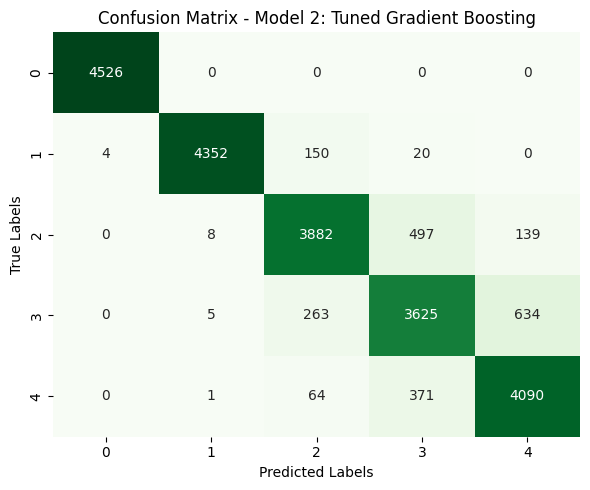

In [ ]:
param_grid_gb2 = {
    'n_estimators': [76, 100],
    'learning_rate': [0.03, 0.07],
    'max_depth': [2, 4],
     'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_gb2 = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid_gb2,
    cv=5,
    n_jobs=-1,
    verbose=1)

grid_gb2.fit(X_train_gb, y_train_gb)
best_gb2 = grid_gb2.best_estimator_

cv_scores_gb2 = cross_val_score(best_gb2, X_train_gb, y_train_gb, cv=5)
print(" Model 2: Gradient Boosting with Hyperparameter Tuning")
print(f"Best Hyperparameters: {grid_gb2.best_params_}")
print(f"Cross-Validation Accuracy Scores: {cv_scores_gb2}")
print(f"Mean CV Accuracy: {cv_scores_gb2.mean():.4f}")

y_pred_gb2 = best_gb2.predict(X_test_gb)

accuracy_gb2 = accuracy_score(y_test_gb, y_pred_gb2)
f1_gb2 = f1_score(y_test_gb, y_pred_gb2, average='weighted')
conf_matrix_gb2 = confusion_matrix(y_test_gb, y_pred_gb2)
report_gb2 = classification_report(y_test_gb, y_pred_gb2, digits=4)

print("\n Classification Report - Model 2 (Gradient Boosting):")
print(report_gb2)
print("\n Confusion Matrix - Model 2 (Gradient Boosting):")
print(conf_matrix_gb2)
print(f"\n Test Accuracy - Model 2: {accuracy_gb2:.4f}")
print(f" Weighted F1 Score - Model 2: {f1_gb2:.4f}")

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_gb2, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Confusion Matrix - Model 2: Tuned Gradient Boosting")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

 ROC Curve for Gradient Boosting Model2

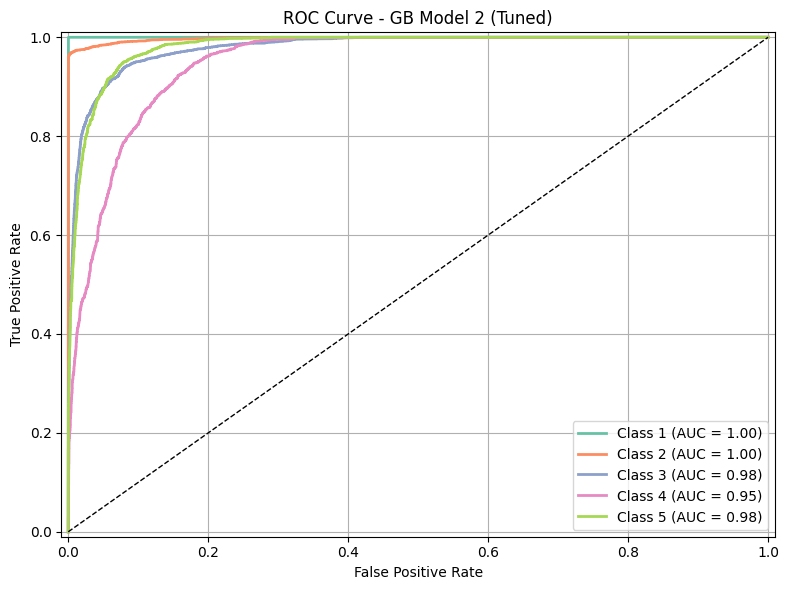

In [ ]:
classes = [1, 2, 3, 4, 5]
y_test_bin = label_binarize(y_test_gb, classes=classes)
y_train_bin = label_binarize(y_train_gb, classes=classes)

ovr_gb2 = OneVsRestClassifier(best_gb2)
ovr_gb2.fit(X_train_gb, y_train_bin)
y_score_gb2 = ovr_gb2.predict_proba(X_test_gb)

plt.figure(figsize=(8, 6))
colors = sns.color_palette("Set2", len(classes))

for i, color in zip(range(len(classes)), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_gb2[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, color=color, label=f'Class {classes[i]} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.title("ROC Curve - GB Model 2 (Tuned)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


Learning Curve for Gradient Boosting Model2

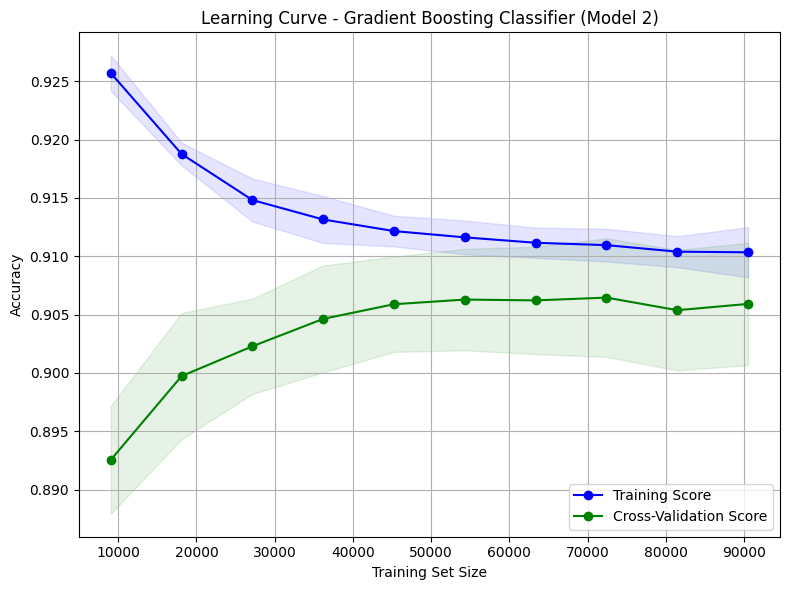

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_gb2,
    X=X_b,
    y=y_b,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    shuffle=True,
    random_state=42)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Training Score', color='blue')
plt.plot(train_sizes, test_mean, 'o-', label='Cross-Validation Score', color='green')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
plt.title("Learning Curve - Gradient Boosting Classifier (Model 2)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

Feature Importance for Gardient Boosting Model2

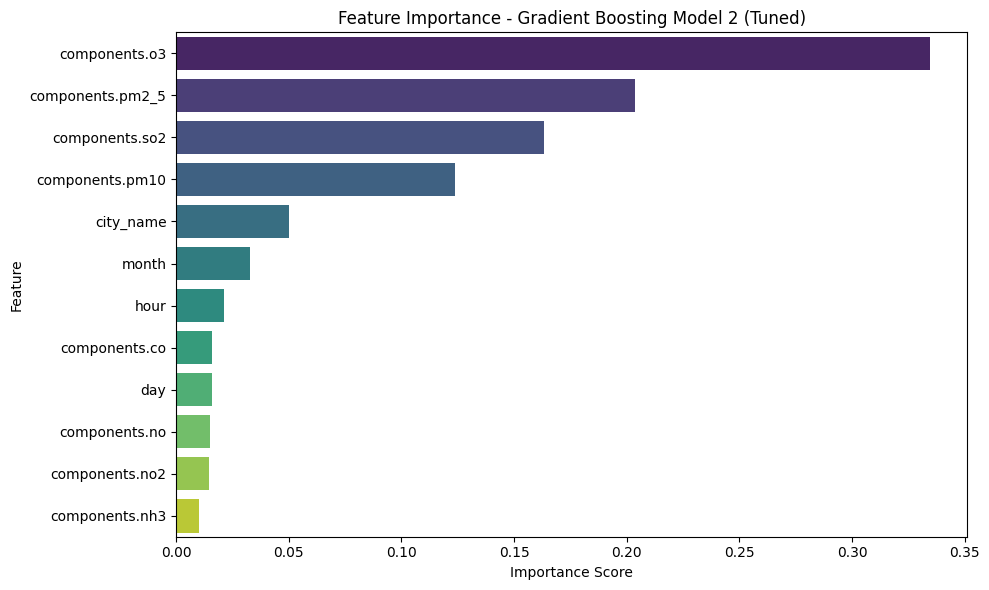

In [ ]:
feature_names = X_b.columns

importances = best_gb2.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Feature Importance - Gradient Boosting Model 2 (Tuned)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Save Gardient Boost Model File

In [ ]:
joblib.dump(gb_model_1, "gb_model_1.pkl")

['gb_model_1.pkl']

In [ ]:
joblib.dump(best_gb2, "gb_model_2_tuned.pkl")

##Third Model : XG Boosting Model

XGBoost Model1 : Cross Validation

In [ ]:
y_b_fixed = y_b - 1  # Convert [1,2,3,4,5] ➝ [0,1,2,3,4]

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(
    X_b, y_b_fixed, test_size=0.2, random_state=42, stratify=y_b_fixed)

xgb_model_1 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model_1.fit(X_train_xgb, y_train_xgb)

cv_scores_xgb1 = cross_val_score(xgb_model_1, X_train_xgb, y_train_xgb, cv=5)
print(" Model 1: XGBoost Classifier (Default Parameters)")
print(f"Cross-Validation Accuracy Scores: {cv_scores_xgb1}")
print(f"Mean CV Accuracy: {cv_scores_xgb1.mean():.4f}")

y_pred_xgb1 = xgb_model_1.predict(X_test_xgb)

accuracy_xgb1 = accuracy_score(y_test_xgb, y_pred_xgb1)
f1_xgb1 = f1_score(y_test_xgb, y_pred_xgb1, average='weighted')
cm_xgb1 = confusion_matrix(y_test_xgb, y_pred_xgb1)
report_xgb1 = classification_report(y_test_xgb, y_pred_xgb1, digits=4)



 Model 1: XGBoost Classifier (Default Parameters)
Cross-Validation Accuracy Scores: [0.97553162 0.97652582 0.97359845 0.97475835 0.97575122]
Mean CV Accuracy: 0.9752



 Classification Report - Model 1 (XGBoost):
              precision    recall  f1-score   support

           0     0.9989    1.0000    0.9994      4526
           1     0.9975    0.9757    0.9865      4526
           2     0.9704    0.9638    0.9671      4526
           3     0.9564    0.9748    0.9655      4527
           4     0.9706    0.9788    0.9747      4526

    accuracy                         0.9786     22631
   macro avg     0.9788    0.9786    0.9786     22631
weighted avg     0.9788    0.9786    0.9786     22631


 Confusion Matrix - Model 1 (XGBoost):
[[4526    0    0    0    0]
 [   5 4416  100    5    0]
 [   0   10 4362  111   43]
 [   0    1   22 4413   91]
 [   0    0   11   85 4430]]

 Test Accuracy - Model 1: 0.9786
 Weighted F1 Score - Model 1: 0.9786


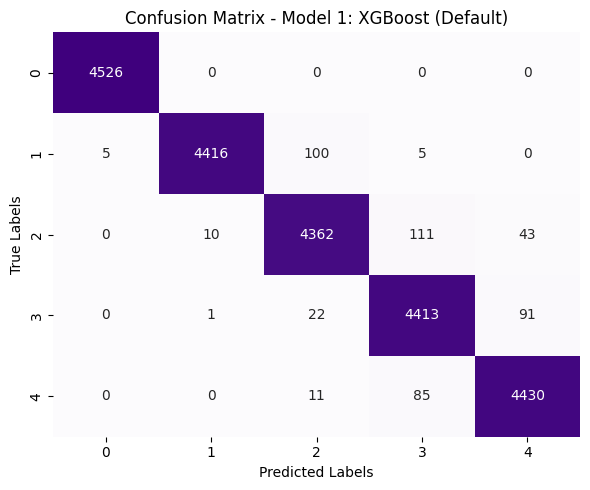

In [ ]:
print("\n Classification Report - Model 1 (XGBoost):")
print(report_xgb1)
print("\n Confusion Matrix - Model 1 (XGBoost):")
print(cm_xgb1)
print(f"\n Test Accuracy - Model 1: {accuracy_xgb1:.4f}")
print(f" Weighted F1 Score - Model 1: {f1_xgb1:.4f}")

plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb1, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title("Confusion Matrix - Model 1: XGBoost (Default)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

 Learning Curve for XGBoost Model1



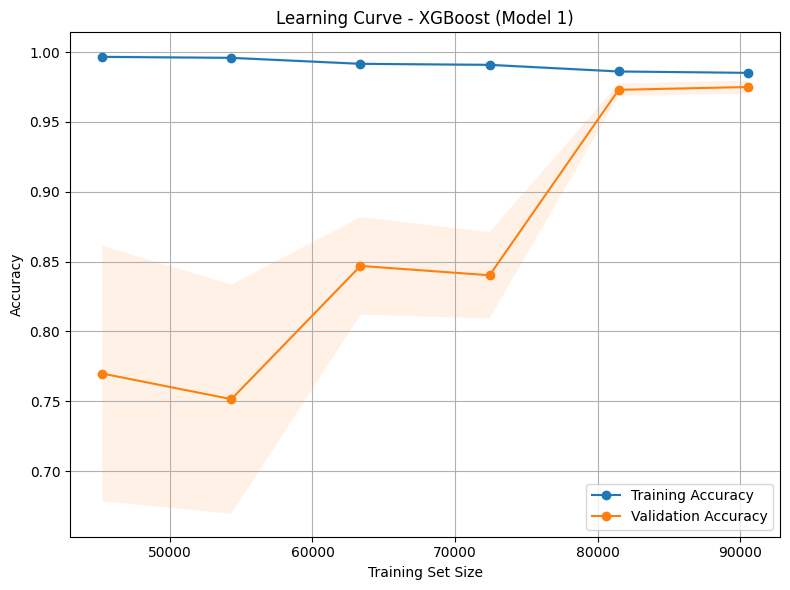

In [ ]:
train_sizes_xgb, train_scores_xgb, test_scores_xgb = learning_curve(
    estimator=xgb_model_1,
    X=X_b,
    y=y_b_fixed,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

train_mean_xgb = np.mean(train_scores_xgb, axis=1)
test_mean_xgb = np.mean(test_scores_xgb, axis=1)
train_std_xgb = np.std(train_scores_xgb, axis=1)
test_std_xgb = np.std(test_scores_xgb, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes_xgb, train_mean_xgb, 'o-', label='Training Accuracy')
plt.plot(train_sizes_xgb, test_mean_xgb, 'o-', label='Validation Accuracy')
plt.fill_between(train_sizes_xgb, train_mean_xgb - train_std_xgb, train_mean_xgb + train_std_xgb, alpha=0.1)
plt.fill_between(train_sizes_xgb, test_mean_xgb - test_std_xgb, test_mean_xgb + test_std_xgb, alpha=0.1)

plt.title('Learning Curve - XGBoost (Model 1)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


 ROC Curve for XGBoost Model 1

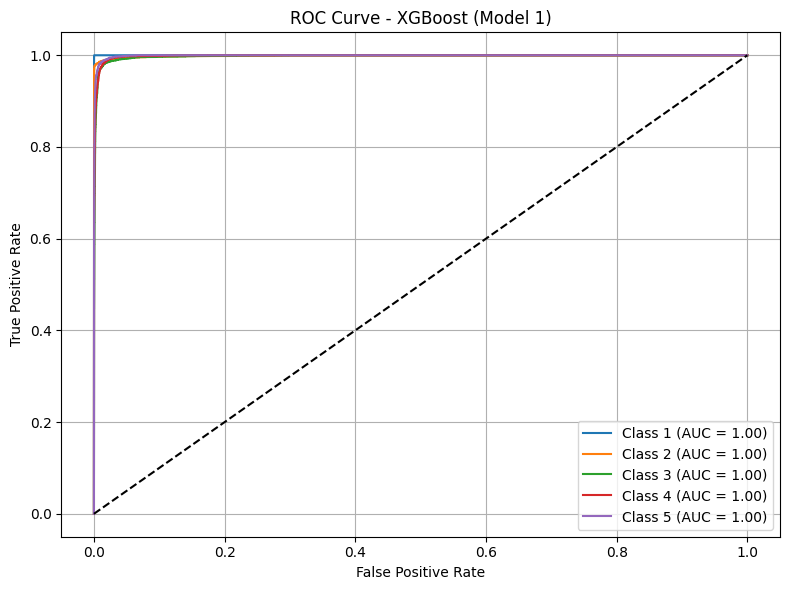

In [ ]:
classes_xgb = list(range(5))  # Classes: 0–4
y_test_bin_xgb = label_binarize(y_test_xgb, classes=classes_xgb)
y_score_xgb = xgb_model_1.predict_proba(X_test_xgb)

fpr_xgb, tpr_xgb, roc_auc_xgb = {}, {}, {}
for i in range(len(classes_xgb)):
    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_test_bin_xgb[:, i], y_score_xgb[:, i])
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])

# Plot ROC
plt.figure(figsize=(8, 6))
for i in range(len(classes_xgb)):
    plt.plot(fpr_xgb[i], tpr_xgb[i], label=f'Class {i+1} (AUC = {roc_auc_xgb[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - XGBoost (Model 1)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


Feature Importance for XGBoost Model 1


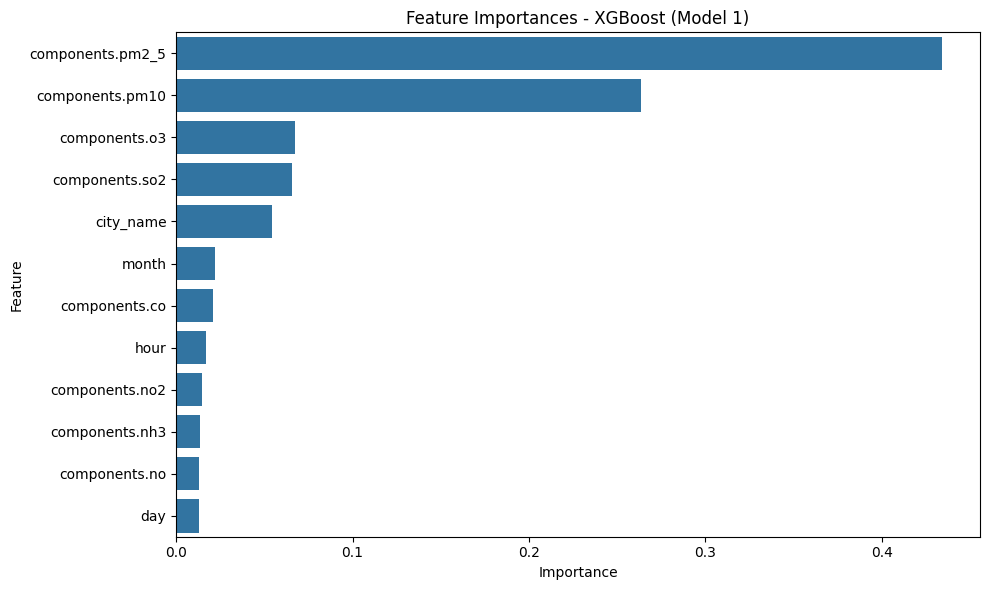

In [ ]:
importances_xgb = xgb_model_1.feature_importances_
features_xgb = X_b.columns

importance_df_xgb = pd.DataFrame({
    'Feature': features_xgb,
    'Importance': importances_xgb
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_xgb)
plt.title('Feature Importances - XGBoost (Model 1)')
plt.tight_layout()
plt.show()


XGBoost Model 2 : Hyperparameter

Fitting 5 folds for each of 8 candidates, totalling 40 fits
🔍 Model 2: XGBoost Classifier with Hyperparameter Tuning
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Cross-Validation Accuracy Scores: [0.94366197 0.94426954 0.94095554 0.94228114 0.94642068]
Mean CV Accuracy: 0.9435

Classification Report - Model 2 (XGBoost Tuned):
              precision    recall  f1-score   support

           0     0.9989    1.0000    0.9994      4526
           1     0.9979    0.9649    0.9811      4526
           2     0.9414    0.9191    0.9301      4526
           3     0.8921    0.9021    0.8971      4527
           4     0.9061    0.9463    0.9258      4526

    accuracy                         0.9465     22631
   macro avg     0.9473    0.9465    0.9467     22631
weighted avg     0.9473    0.9465    0.9467     22631


Confusion Matrix - Model 2 (XGBoost Tuned):
[[4526    0    0    0    0]
 [   5 4367  143   11    0]
 [   0 

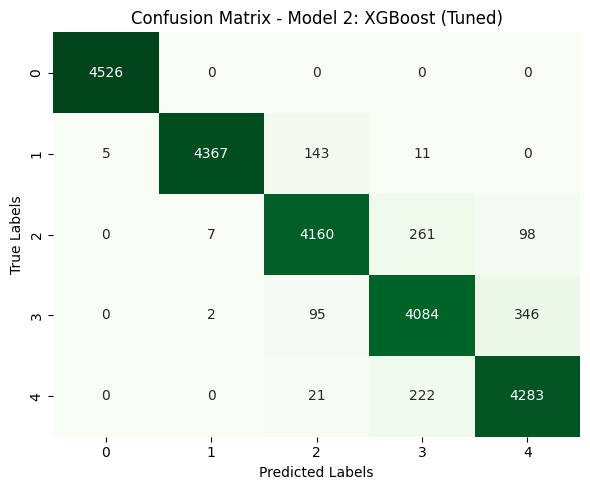

In [ ]:
param_grid_xgb2 = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

grid_xgb2 = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    param_grid=param_grid_xgb2,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_xgb2.fit(X_train_xgb, y_train_xgb)
best_xgb2 = grid_xgb2.best_estimator_

cv_scores_xgb2 = cross_val_score(best_xgb2, X_train_xgb, y_train_xgb, cv=5)
print(" Model 2: XGBoost Classifier with Hyperparameter Tuning")
print(f"Best Parameters: {grid_xgb2.best_params_}")
print(f"Cross-Validation Accuracy Scores: {cv_scores_xgb2}")
print(f"Mean CV Accuracy: {cv_scores_xgb2.mean():.4f}")

y_pred_xgb2 = best_xgb2.predict(X_test_xgb)

accuracy_xgb2 = accuracy_score(y_test_xgb, y_pred_xgb2)
f1_xgb2 = f1_score(y_test_xgb, y_pred_xgb2, average='weighted')
cm_xgb2 = confusion_matrix(y_test_xgb, y_pred_xgb2)
report_xgb2 = classification_report(y_test_xgb, y_pred_xgb2, digits=4)

print("\nClassification Report - Model 2 (XGBoost Tuned):")
print(report_xgb2)
print("\nConfusion Matrix - Model 2 (XGBoost Tuned):")
print(cm_xgb2)
print(f"\nTest Accuracy - Model 2: {accuracy_xgb2:.4f}")
print(f"Weighted F1 Score - Model 2: {f1_xgb2:.4f}")

plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb2, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Confusion Matrix - Model 2: XGBoost (Tuned)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

ROC Curve for XGBoost Model2

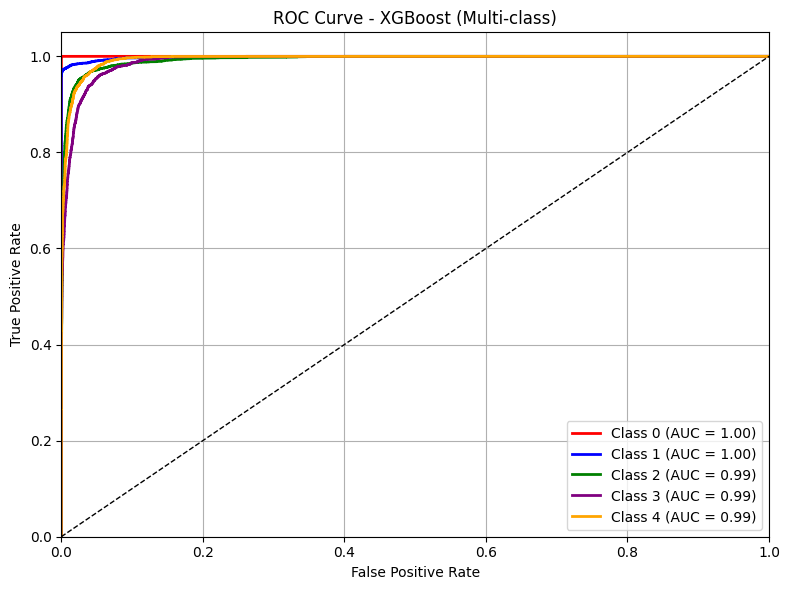

In [ ]:
classes = np.unique(y_test_xgb)
y_test_bin = label_binarize(y_test_xgb, classes=classes)
n_classes = y_test_bin.shape[1]

y_score = best_xgb2.predict_proba(X_test_xgb)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = cycle(['red', 'blue', 'green', 'purple', 'orange'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost (Multi-class)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

Learning Curve for XGBoost Model2

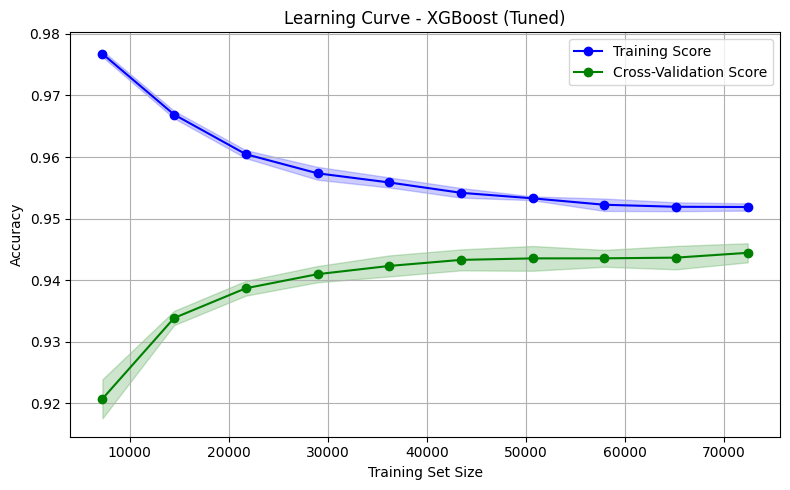

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(
    best_xgb2,
    X_train_xgb,
    y_train_xgb,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_mean, 'o-', color='green', label='Cross-Validation Score')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color='green')
plt.title('Learning Curve - XGBoost (Tuned)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

Feature Importance of Xg Boost Model2

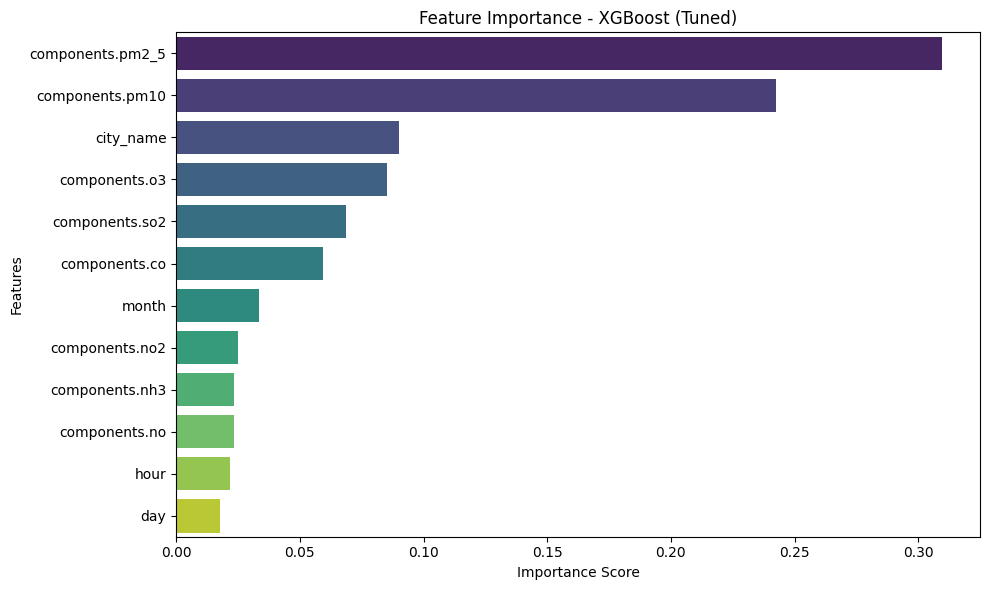

In [ ]:
importances = best_xgb2.feature_importances_
features = X_train_xgb.columns

sorted_idx = np.argsort(importances)[::-1]
sorted_features = [features[i] for i in sorted_idx]
sorted_importances = importances[sorted_idx]

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_features, palette='viridis')
plt.title("Feature Importance - XGBoost (Tuned)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

Save XG Boosting Model file

In [ ]:
joblib.dump(xgb_model_1, "xgb_model_1.pkl")


['xgb_model_1.pkl']

In [ ]:
joblib.dump(best_xgb2, "xgb_model_2_tuned.pkl")

## Fourth Model : Long Short Term Memory (LSTM)


 Training model for city: Batangas City
AQI Class Distribution in Batangas City:
main.aqi
1    3272
2    2628
3     328
4      31
5       7
Name: count, dtype: int64



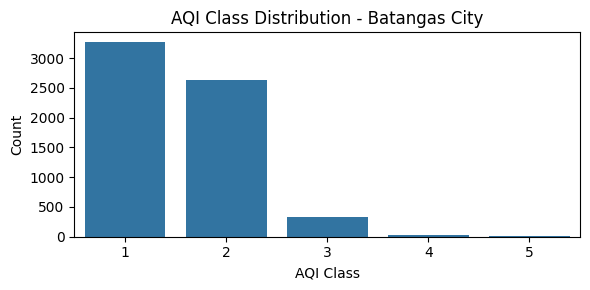

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step

===== Batangas City =====
Accuracy: 0.8135
              precision    recall  f1-score   support

           1       0.83      0.96      0.89       766
           2       0.91      0.58      0.71       479
           3       0.06      0.75      0.11         4

    accuracy                           0.81      1249
   macro avg       0.60      0.76      0.57      1249
weighted avg       0.86      0.81      0.82      1249



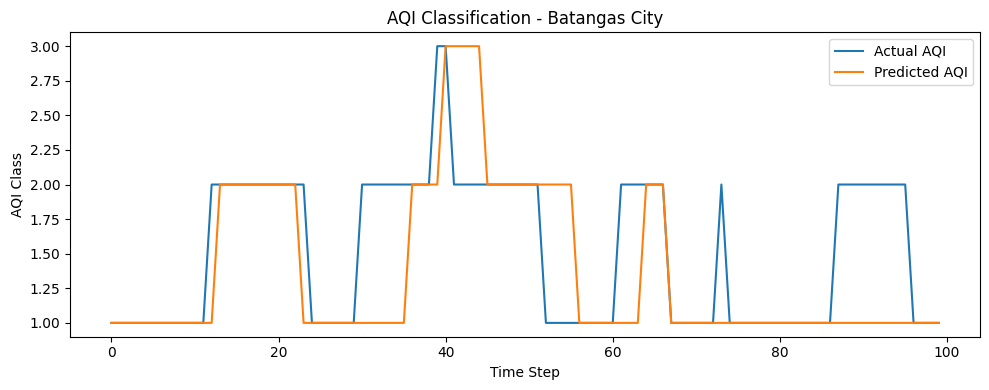

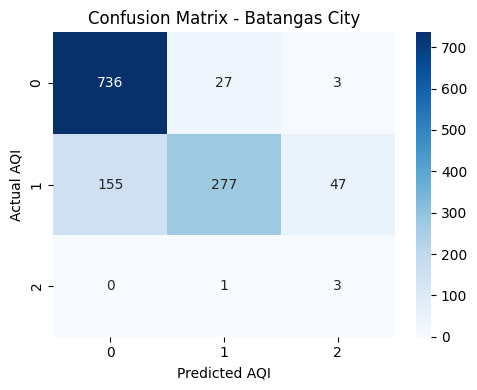

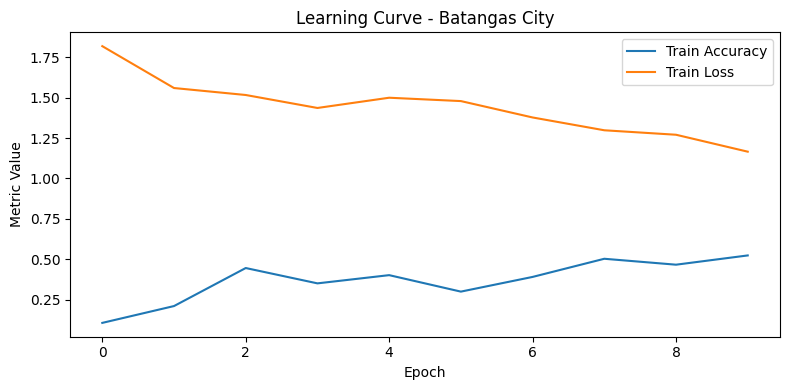


 Training model for city: Cebu City
AQI Class Distribution in Cebu City:
main.aqi
1    4292
2    1716
3     242
4      18
5       2
Name: count, dtype: int64



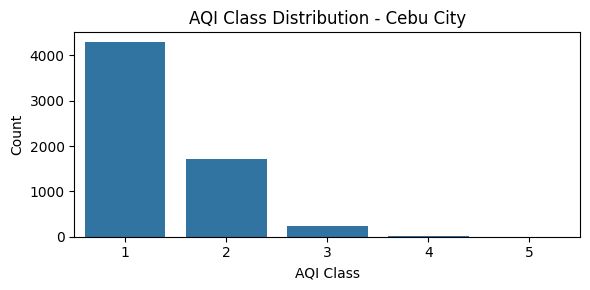

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step

===== Cebu City =====
Accuracy: 0.8576
              precision    recall  f1-score   support

           1       0.86      0.99      0.92      1050
           2       0.82      0.14      0.24       200

    accuracy                           0.86      1250
   macro avg       0.84      0.57      0.58      1250
weighted avg       0.85      0.86      0.81      1250



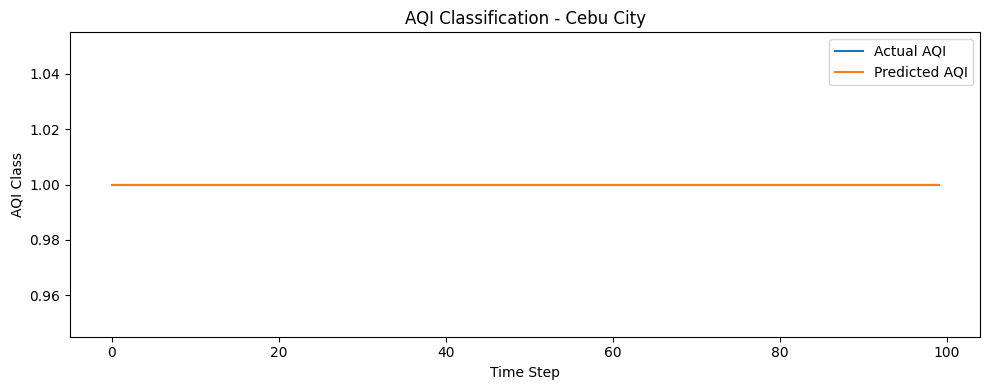

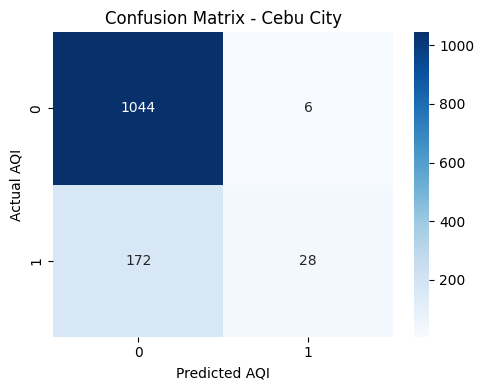

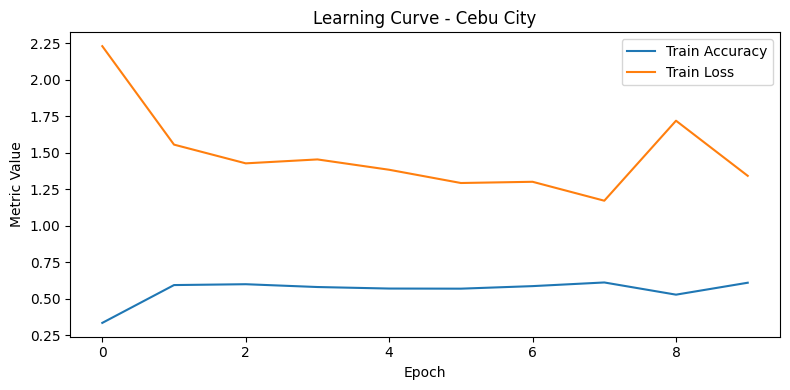


 Training model for city: Iloilo City
AQI Class Distribution in Iloilo City:
main.aqi
1    4331
2    1740
3     197
4       3
Name: count, dtype: int64



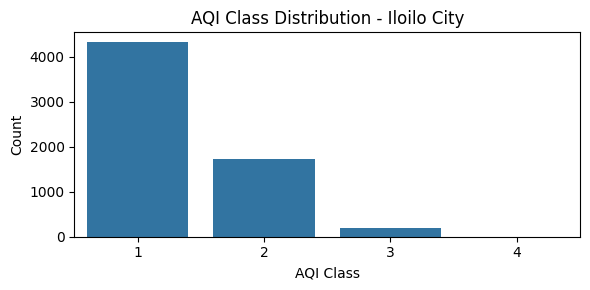

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step

===== Iloilo City =====
Accuracy: 0.6512
              precision    recall  f1-score   support

           1       0.86      0.64      0.73       836
           2       0.45      0.76      0.56       369
           3       0.00      0.00      0.00        45

    accuracy                           0.65      1250
   macro avg       0.44      0.47      0.43      1250
weighted avg       0.71      0.65      0.66      1250



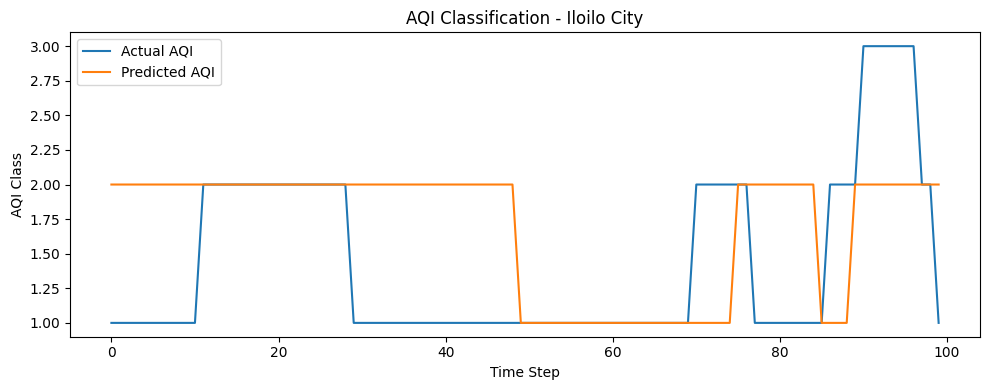

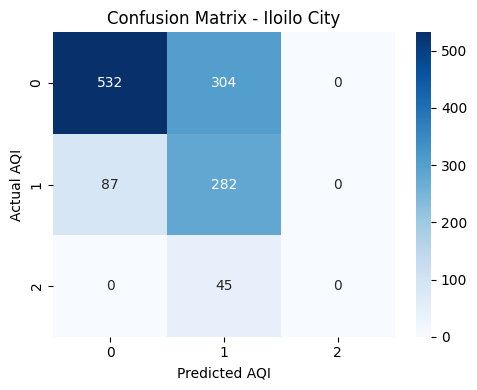

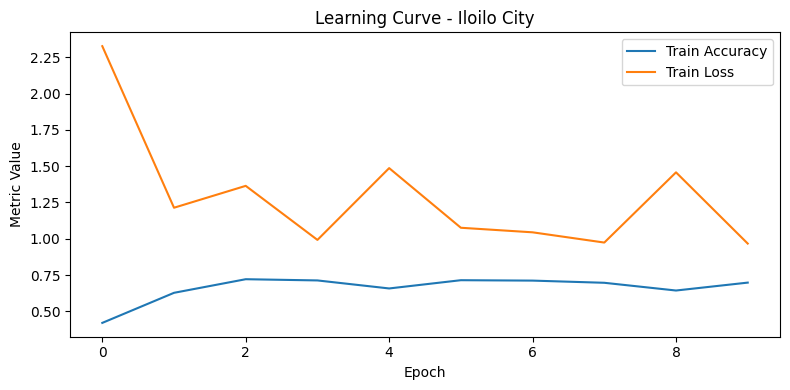


 Training model for city: Legazpi City
AQI Class Distribution in Legazpi City:
main.aqi
1    4413
2    1691
3     148
4      17
5       3
Name: count, dtype: int64



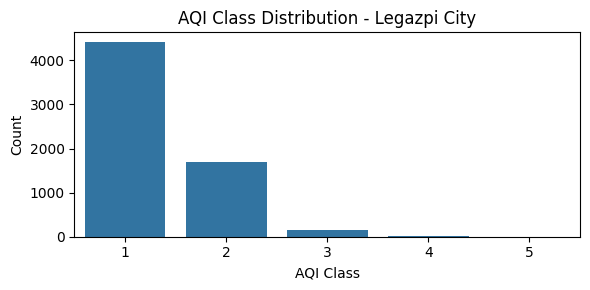

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step

===== Legazpi City =====
Accuracy: 0.8744
              precision    recall  f1-score   support

           1       0.98      0.96      0.97      1083
           2       0.64      0.26      0.37       155
           3       0.08      0.83      0.14        12

    accuracy                           0.87      1250
   macro avg       0.57      0.69      0.50      1250
weighted avg       0.93      0.87      0.89      1250



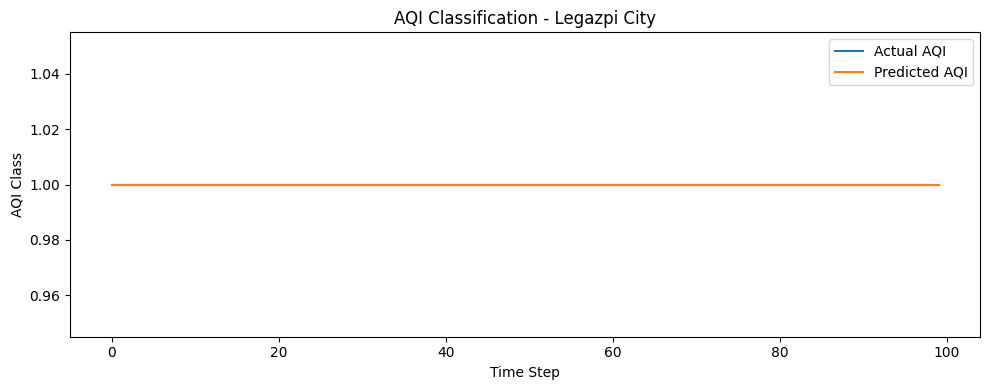

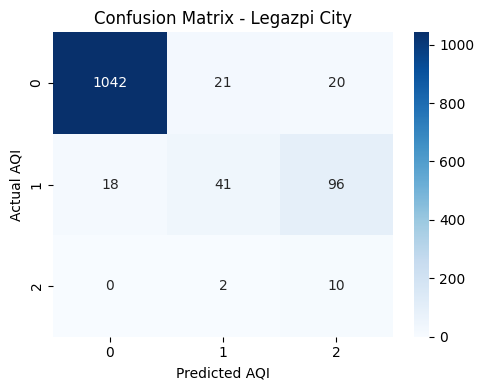

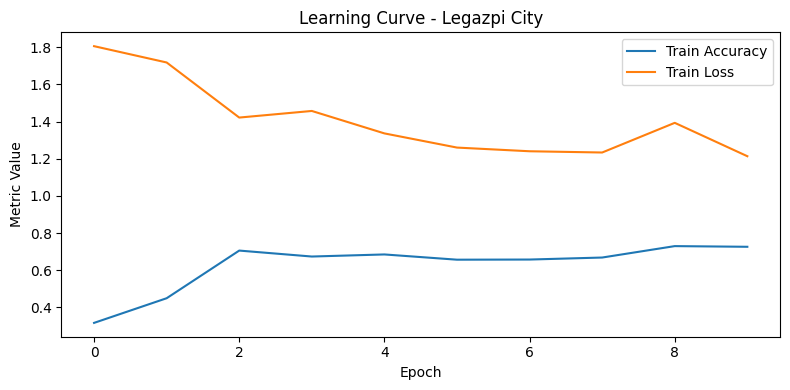


 Training model for city: Lucena
AQI Class Distribution in Lucena:
main.aqi
1    4544
2    1551
3     177
4       1
Name: count, dtype: int64



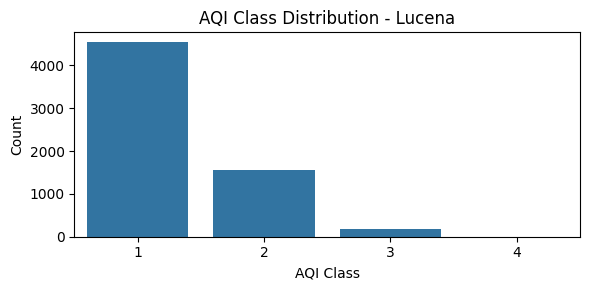

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step

===== Lucena =====
Accuracy: 0.6392
              precision    recall  f1-score   support

           1       0.80      0.66      0.72       832
           2       0.44      0.66      0.53       382
           3       0.00      0.00      0.00        36

    accuracy                           0.64      1250
   macro avg       0.42      0.44      0.42      1250
weighted avg       0.67      0.64      0.64      1250



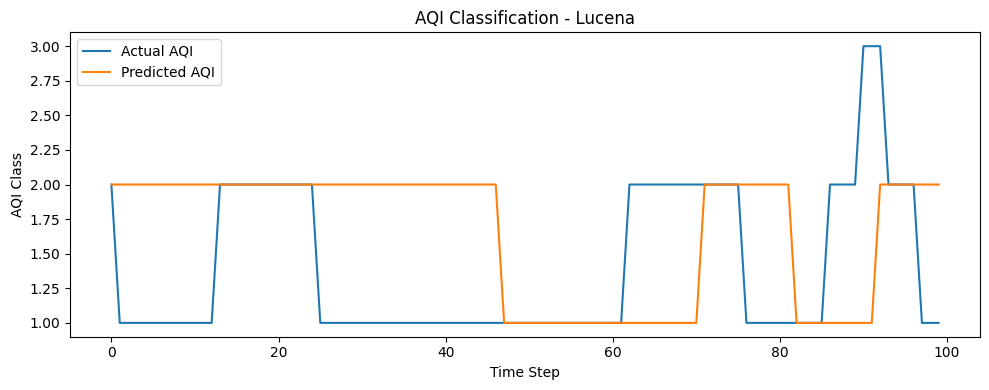

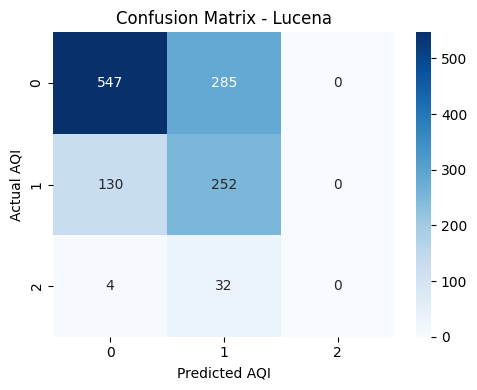

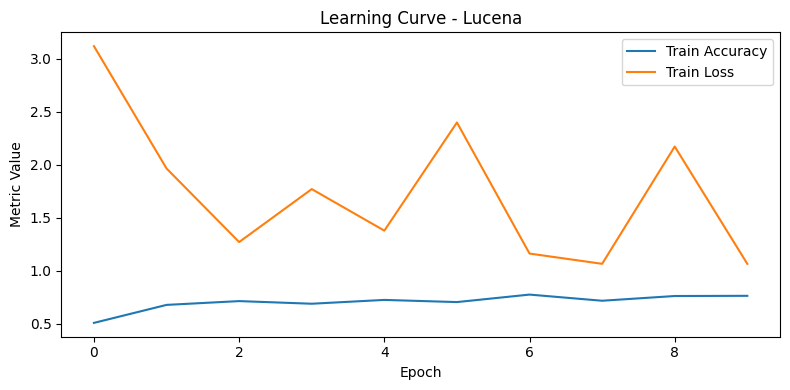


 Training model for city: Manila
AQI Class Distribution in Manila:
main.aqi
1    1779
2    2897
3     946
4     311
5     340
Name: count, dtype: int64



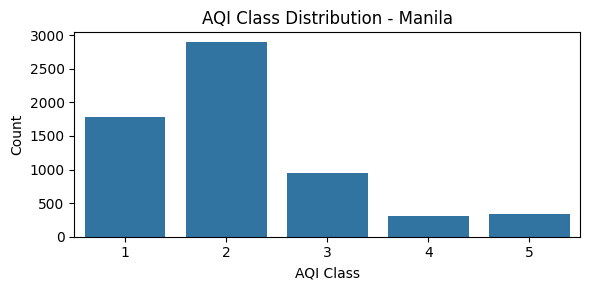

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step

===== Manila =====
Accuracy: 0.7272
              precision    recall  f1-score   support

           1       0.85      0.91      0.88       647
           2       0.72      0.55      0.63       437
           3       0.47      0.48      0.47       158
           4       0.08      0.62      0.14         8

    accuracy                           0.73      1250
   macro avg       0.53      0.64      0.53      1250
weighted avg       0.75      0.73      0.73      1250



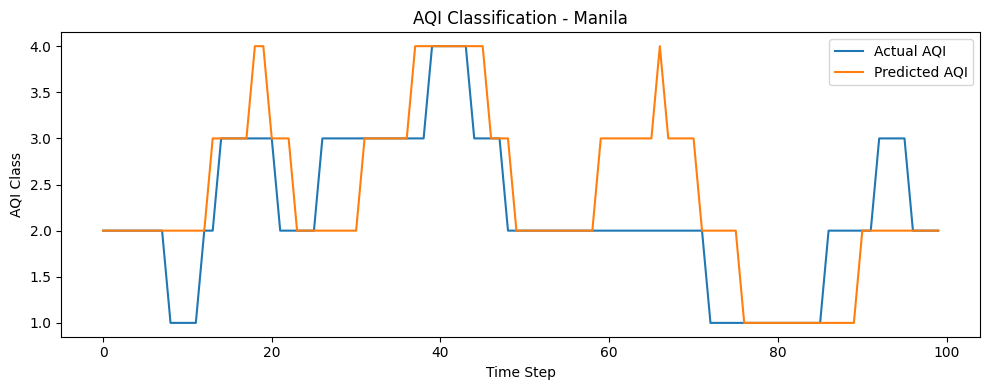

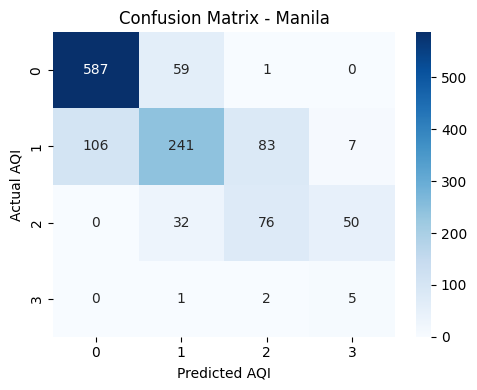

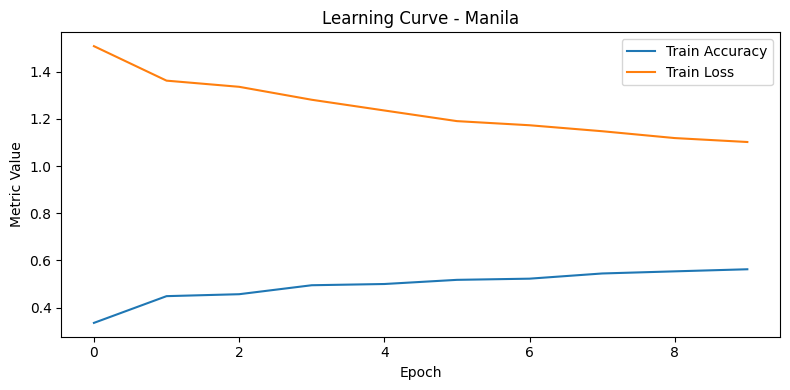


=== Final LSTM Classification Summary ===
            City  Accuracy
0  Batangas City      0.81
1      Cebu City      0.86
2    Iloilo City      0.65
3   Legazpi City      0.87
4         Lucena      0.64
5         Manila      0.73


In [ ]:
data3['datetime'] = pd.to_datetime(data3['datetime'])
data3 = data3.sort_values(['city_name', 'datetime'])

features = ['components.co', 'components.no', 'components.no2', 'components.o3',
            'components.so2', 'components.pm2_5', 'components.pm10', 'components.nh3',
            'hour', 'day', 'month']
target = 'main.aqi'
n_steps = 24

results = []

for city in data3['city_name'].unique():
    print(f"\n Training model for city: {city}")
    city_df = data3[data3['city_name'] == city].dropna()

    class_counts = city_df[target].value_counts().sort_index()
    print(f"AQI Class Distribution in {city}:\n{class_counts}\n")

    plt.figure(figsize=(6, 3))
    sns.countplot(x=city_df[target])
    plt.title(f'AQI Class Distribution - {city}')
    plt.xlabel('AQI Class')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

    total = class_counts.sum()
    if class_counts.max() / total > 0.95 or class_counts.nunique() == 1:
        print(f" Skipping {city} due to severe imbalance or single class.\n")
        continue

    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(city_df[features])
    y_raw = city_df[target].values - 1
    num_classes = len(np.unique(y_raw))

    class_weights_arr = compute_class_weight(class_weight='balanced', classes=np.unique(y_raw), y=y_raw)
    class_weights_dict = dict(enumerate(class_weights_arr))

    def create_sequences(X, y, steps):
        X_seq, y_seq = [], []
        for i in range(steps, len(X)):
            X_seq.append(X[i-steps:i])
            y_seq.append(y[i])
        return np.array(X_seq), np.array(y_seq)

    X_seq, y_seq = create_sequences(X_scaled, y_raw, n_steps)
    split = int(0.8 * len(X_seq))
    X_train, X_test = X_seq[:split], X_seq[split:]
    y_train, y_test = y_seq[:split], y_seq[split:]

    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=(n_steps, len(features))))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=10, verbose=0, class_weight=class_weights_dict)

    y_pred_prob = model.predict(X_test)
    y_pred_class = y_pred_prob.argmax(axis=1) + 1
    y_true_class = y_test + 1

    acc = accuracy_score(y_true_class, y_pred_class)
    report = classification_report(y_true_class, y_pred_class, output_dict=False)
    print(f"\n===== {city} =====")
    print(f"Accuracy: {acc:.4f}")
    print(report)

    results.append({
        'City': city,
        'Accuracy': round(acc, 4)})

    plt.figure(figsize=(10, 4))
    plt.plot(y_true_class[:100], label='Actual AQI')
    plt.plot(y_pred_class[:100], label='Predicted AQI')
    plt.title(f'AQI Classification - {city}')
    plt.xlabel('Time Step')
    plt.ylabel('AQI Class')
    plt.legend()
    plt.tight_layout()
    plt.show()

    if len(np.unique(y_true_class)) > 1:
        cm = confusion_matrix(y_true_class, y_pred_class)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {city}')
        plt.xlabel('Predicted AQI')
        plt.ylabel('Actual AQI')
        plt.tight_layout()
        plt.show()
    else:
        print(f" Skipping confusion matrix for {city} — only one AQI class present.\n")

    # Plot: Learning Curve
    if 'accuracy' in history.history:
        plt.figure(figsize=(8, 4))
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['loss'], label='Train Loss')
        plt.title(f'Learning Curve - {city}')
        plt.xlabel('Epoch')
        plt.ylabel('Metric Value')
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print(f" Skipping learning curve for {city} — no accuracy data.\n")

# Summary Table
results_df = pd.DataFrame(results)
print("\n=== Final LSTM Classification Summary ===")
print(results_df)


##Save LSTM model of each city

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
✔ Saved: model_Batangas_City.json, model_weights_Batangas_City.pkl, scaler_Batangas_City.pkl
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
✔ Saved: model_Cebu_City.json, model_weights_Cebu_City.pkl, scaler_Cebu_City.pkl
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
✔ Saved: model_Iloilo_City.json, model_weights_Iloilo_City.pkl, scaler_Iloilo_City.pkl
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
✔ Saved: model_Legazpi_City.json, model_weights_Legazpi_City.pkl, scaler_Legazpi_City.pkl
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
✔ Saved: model_Lucena.json, model_weights_Lucena.pkl, scaler_Lucena.pkl
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
✔ Saved: model_Manila.json, model_weights_Manila.pkl, scaler_Manila.pkl


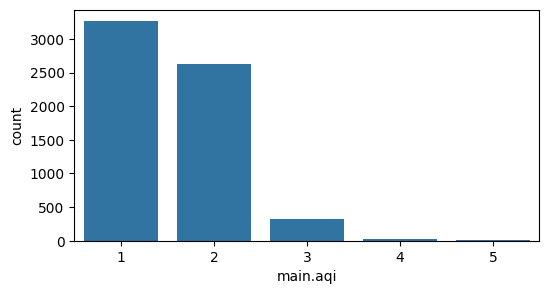

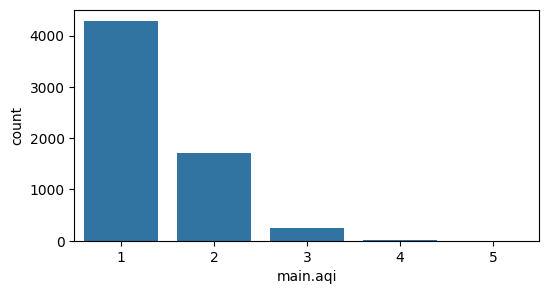

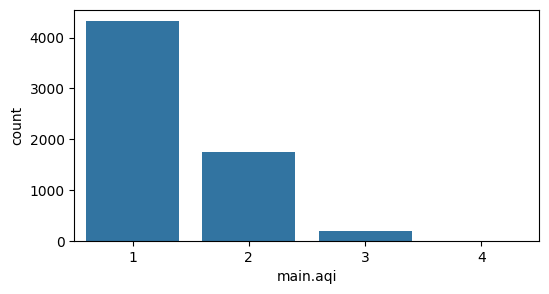

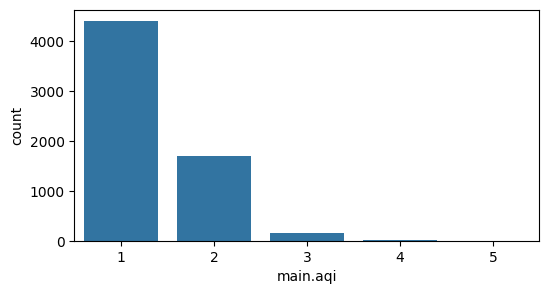

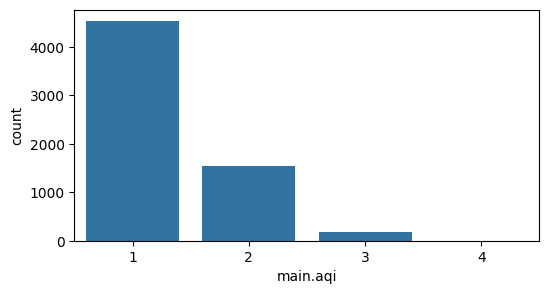

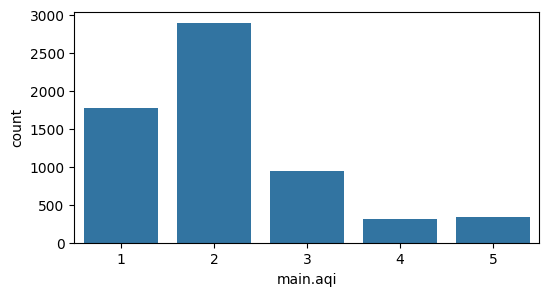

In [ ]:
data3['datetime'] = pd.to_datetime(data3['datetime'])
data3 = data3.sort_values(['city_name', 'datetime'])

features = ['components.co', 'components.no', 'components.no2', 'components.o3',
            'components.so2', 'components.pm2_5', 'components.pm10', 'components.nh3',
            'hour', 'day', 'month']
target = 'main.aqi'
n_steps = 24
results = []

for city in data3['city_name'].unique():
    city_df = data3[data3['city_name'] == city].dropna()

    # Class distribution
    class_counts = city_df[target].value_counts().sort_index()

    plt.figure(figsize=(6, 3))
    sns.countplot(x=city_df[target])

    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(city_df[features])
    y_raw = city_df[target].values - 1
    num_classes = len(np.unique(y_raw))

    class_weights_arr = compute_class_weight(class_weight='balanced', classes=np.unique(y_raw), y=y_raw)
    class_weights_dict = dict(enumerate(class_weights_arr))

    def create_sequences(X, y, steps):
        X_seq, y_seq = [], []
        for i in range(steps, len(X)):
            X_seq.append(X[i-steps:i])
            y_seq.append(y[i])
        return np.array(X_seq), np.array(y_seq)

    X_seq, y_seq = create_sequences(X_scaled, y_raw, n_steps)
    split = int(0.8 * len(X_seq))
    X_train, X_test = X_seq[:split], X_seq[split:]
    y_train, y_test = y_seq[:split], y_seq[split:]

    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=(n_steps, len(features))))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=10, verbose=0, class_weight=class_weights_dict)

    y_pred_prob = model.predict(X_test)
    y_pred_class = y_pred_prob.argmax(axis=1) + 1
    y_true_class = y_test + 1

    acc = accuracy_score(y_true_class, y_pred_class)
    report = classification_report(y_true_class, y_pred_class, output_dict=False)

    results.append({'City': city, 'Accuracy': round(acc, 4)})

    model_json = model.to_json()
    json_filename = f"model_{city.replace(' ', '_')}.json"
    with open(json_filename, "w") as json_file:
        json_file.write(model_json)

    weights_filename = f"model_weights_{city.replace(' ', '_')}.pkl"
    dump(model.get_weights(), weights_filename)

    scaler_filename = f"scaler_{city.replace(' ', '_')}.pkl"
    dump(scaler, scaler_filename)

    print(f"✔ Saved: {json_filename}, {weights_filename}, {scaler_filename}")




###Model deployment

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib

from sklearn.preprocessing import LabelEncoder

# Load models
model_files = {
    "Random Forest (Base)": "rf_model_1.pkl",
    "Random Forest (Tuned)": "rf_model_2_tuned.pkl",
    "Gradient Boosting (Base)": "gb_model_1.pkl",
    "Gradient Boosting (Tuned)": "gb_model_2_tuned.pkl",
    "XGBoost (Base)": "xgb_model_1.pkl",
    "XGBoost (Tuned)": "xgb_model_2_tuned.pkl"
}

@st.cache_resource
def load_model(path):
    return joblib.load(path)

# App layout
st.title("AQI Classification App")
st.markdown(" Predict Air Quality Index (AQI) Category using trained models.")

model_choice = st.selectbox("Choose a Model", list(model_files.keys()))
selected_model = load_model(model_files[model_choice])

st.subheader("Enter Input Features")
features = ['components.co', 'components.no', 'components.no2', 'components.o3',
            'components.so2', 'components.pm2_5', 'components.pm10', 'components.nh3']

user_input = {}
for feat in features:
    user_input[feat] = st.number_input(f"{feat}", value=0.0)

if st.button("Predict AQI Category"):
    X_input = pd.DataFrame([user_input])
    prediction = selected_model.predict(X_input)[0]
    st.success(f" Predicted AQI Category: {prediction}")